# Daniel Gómez Rámirez

Para esta actividad se va a evaluar un dataset para un caso real obtenido de una empresa relacionada con autobuses, por lo que se descartaran algunas columnas por criterio experto, ya que no aplican para el objetivo real que se pretende, y no afecta  al objetivo de la actividad.

In [400]:
import numpy as np
import pandas as pd

import os

import matplotlib.pyplot as plt
import seaborn as sns

# para poder ver todas las columnas y filas 
pd.options.display.max_rows = 50
pd.options.display.max_columns = 60

# Carga de los datos

En el dataset taller:    
Obtenemos el error  ***"Expected 30 fields in line 76683, saw 32"***. que nos indica que hay filas con más columnas, que las columnas de la primera fila, la solución sería exportar los datos con un separación diferente a la "," o al ";". ya que hay apartados que contienen este caracter. como se han moduficado varias columnas manualmente pero sigue existiendo el error en diferentes filas, para este caso academico descartamos las lineas con este error.

In [401]:

ruta_taller=os.path.join("data",'taller_materiales.csv')
taller = pd.read_csv(ruta_taller, sep='|', index_col = False)#, on_bad_lines='skip')


In [402]:
ruta_vehiculo=os.path.join("data",'veh_flota.csv')
vehiculo = pd.read_csv(ruta_vehiculo, sep=';', index_col = False)#, on_bad_lines='skip')
display(vehiculo)

,id_vehiculo,codigbus,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,bastidor,capacidad,paxdepie,paxsentados,paxpmr,plat_pmr,WC,autoport,marca,modelo,carrocero,categoria,clase,longitud,numcv,tara,cilindrada,potencia,nvl_emisiones,escolar,tipo,subtipo,uso,tall_kilom,tal_feckm,totkilom,activo,dns_vehiculo,dispositivo,combustible
0,1.0,1000,1652KTX,2019-02-26,2019-02-26,3.0,3,Viajes Transvia,YV1XZ72VDK2120951,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VOLVO,XC 40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURISMO,NaN,NaN,NaN,NaN,25233.0,1.0,transvia,NaN,NaN
1,2.0,1001,4975KVS,2019-03-27,2019-03-27,3.0,3,Viajes Transvia,YV1MZ70V1K2184208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VOLVO,V 40 CROSS COUNTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURISMO,NaN,DISCRECIONAL,NaN,NaN,0.0,1.0,transvia,NaN,NaN
2,3.0,1002,8387LBJ,2019-09-26,2019-09-26,3.0,3,Viajes Transvia,YV1MZ70V1K2187434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VOLVO,V 40 CROSS COUNTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURISMO,NaN,DISCRECIONAL,NaN,NaN,30314.0,1.0,transvia,NaN,NaN
3,4.0,1003,5943LCM,2019-11-18,2019-11-18,3.0,3,Viajes Transvia,YV1ZZA8TCL1037937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VOLVO,V 60 CROSS COUNTRY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURISMO,NaN,DISCRECIONAL,NaN,NaN,0.0,1.0,transvia,NaN,NaN
4,5.0,127B,7390JMH,2016-03-07,2016-03-07,6.0,19,Empleadas de Hogar,VNE7257R200001462,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,61 Plazas,USO GENERAL,NaN,NaN,0.0,1.0,transvia,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1527,1386.0,T378,6312FZT,2008-02-05,2008-02-05,14.0,2,Transvia,WKK63310313103984,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SETRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,NaN,DISCRECIONAL,NaN,NaN,0.0,1.0,transvia,NaN,NaN
1528,1387.0,T379,1694HNR,2013-01-25,2013-01-25,9.0,2,Transvia,WMARR4ZZ0CC017540,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BEULAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,NaN,DISCRECIONAL,NaN,NaN,0.0,1.0,transvia,NaN,NaN
1529,1388.0,T380,8156JWS,2017-02-09,2017-02-09,5.0,2,Transvia,WMARR2ZZ7HC022858,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IRIZAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL,NaN,DISCRECIONAL,NaN,NaN,633800.0,1.0,transvia,NaN,NaN
1530,1389.0,B191,1983HST,2013-09-06,2013-09-06,9.0,43,Buñol,WMARR2ZZ0DC018399,55,NaN,55,NaN,NaN,NaN,NaN,MAN,PB 13.37,IRIZAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NORMAL 45-62 PAX,Normal 56 pax,USO GENERAL,NaN,NaN,0.0,1.0,bunyol,NaN,NaN


# Analisis Dataset TALLER

sabemos que estas columnas  tienes tipos diferentes de datos las trataremos mas adelante si es necesario, por lo que podemos deducir que hay filas que no están correctamente declaradas

In [403]:
print(taller.shape)
taller.sample(5)

(189154, 30)


,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,ctr_serie,ctr_rueda,nomalmac,prove art,nomfamia,nommarca,nomresid,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,mecanico,mecanico ape,cliente
10831,2009,90632,2,CORREA ACANALADA 5PK1525,1.0,157.46,125.97,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",CORREA ACANALADA 5PK1525,2013-01-25,2020-11-03,22.440,1,0,0,ALMACEN QUART,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",CORREAS,MAN,NaN,UNIDADES,B139,2009-02-10,60000,2009-02-11,0,CORREAS Y RUEDAS,NaN,NaN,BUÑOL S.L.-AUTOBUSES
102016,2017,1711263,5,FILTRO COMBINATO MERCEDES,1.0,29.10,18.91,MERCEDES-BENZ VALENCIA,FILTRO COMBINATO MERCEDES,2012-02-15,2022-04-20,17.796,1,0,0,ALMACEN QUART,VALDISA,FILTROS,SIN ASIGNAR,NaN,UNIDADES,D314,2017-12-19,185158,2017-12-19,0,MATERIAL -FILTROS-,NaN,NaN,"MEDTRAST 98, S.L."
141444,2019,1910807,1,EXTINTORES,2.0,3.95,7.90,"TALLERES CALAFORRA, S.L.",EXTINTORES,2013-02-06,2022-04-27,6.550,1,0,0,ALMACEN QUART,"TALLERES CALAFORRA, S.L.",VARIOS,SIN ASIGNAR,NaN,UNIDADES,T355,2019-11-07,1235779,2019-11-07,0,MATERIAL-EXTINTORES,NaN,NaN,TRANSVIA S.L.
80227,2016,1607515,2,TOBERA INYECTOR MERCEDES,4.0,67.00,268.00,"TALLERES GUERRERO, C.B.",TOBERA INYECTOR MERCEDES,2011-02-28,2016-09-20,67.000,1,0,0,ALMACEN QUART,"TALLERES GUERRERO, C.B.",ELEMENTOS MOTOR,SIN ASIGNAR,NaN,UNIDADES,N188,2016-09-21,0,2016-09-21,0,M.O. -REPARAR INYECTORES-,NaN,NaN,"AUTOS VALLDUXENSE, S.A-"
77563,2016,1605826,1,BATERIA +IZQ. 12V 180AH,2.0,110.00,220.00,EUROPART,BATERIA +IZQ. 12V 180AH,2016-04-14,2019-11-15,110.000,1,0,0,ALMACEN QUART,EUROPART,MATERIAL ELECTRICO,NaN,NaN,UNIDADES,C097,2016-07-18,864841,2016-07-18,0,MATERIAL -BATERIAS-,NaN,NaN,LA CONCEPCION S.L.-AUTOBUSES


con este codigo verificabamos el numero de columnas de las filas para buscar donde habia un error en la fila, en este caso concreto, se verificó que la fila 8 y 9 debian estar en la misma fila.

In [404]:
a='2008|85505|1|VAVULA AGUA CALEFACCION 3/4" 24V.|1.00|143.2200|143.22|VELASCO-DE DIEGO, S.L.|VAVULA AGUA CALEFACCION 3/4" 24V.|2008-10-15|2008-10-15|143.220000|1|0|0|ALMACEN QUART|VELASCO-DE DIEGO, S.L.|BOMBAS AGUA Y VALVULAS|SIN ASIGNAR||UNIDADES|F172|2008-10-15|0|2008-10-20|0||||FERNANBUS S.A.'
a= pd.Series(a.split("|"))
print(len(a))

30


In [405]:
a='2016;1603791;1;IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V;5.00;3.5000;17.50;ELECTRONICA GIMENO S.L.;IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V;80A;2016-05-13;2016-05-13;3.500000;1;0;0;ALMACEN QUART;ELECTRONICA GIMENO S.L.;IMAGEN Y SONIDO;;;UNIDADES;U316;2016-05-13;273287;2016-05-13;0;MATERIAL -CONECTORES, MANDO A DISTANCIA Y VENTILADOR-;;;VIAJES TRANSVIA TOURS, S.L.'
a= pd.Series(a.split(";"))
print(len(a))
a

31


0                                                  2016
1                                               1603791
2                                                     1
3              IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V
4                                                  5.00
5                                                3.5000
6                                                 17.50
7                               ELECTRONICA GIMENO S.L.
8              IRFB3607PBF N-MOSFET UNIPOLAR HEXFET 75V
9                                                   80A
10                                           2016-05-13
11                                           2016-05-13
12                                             3.500000
13                                                    1
14                                                    0
15                                                    0
16                                        ALMACEN QUART
17                              ELECTRONICA GIME

buscamos registros duplicados y vemos que para el dataset taller hay 0

In [406]:
print(taller.duplicated().sum())

0


## Missings
buscamos  los missings para el dataset taller

In [407]:
missing_taller=taller.isna().sum()/len(taller)*100
missing_taller=pd.DataFrame(missing_taller)
missing_taller

,0
anyparte,0.000000
numparte,0.000000
numlinea,0.000000
descrip,0.000000
cantidad,0.000000
precio,0.000000
importe,0.000000
prove mat,0.312444
nomartic,0.000000
fec_alta,0.000000


In [408]:


#missing_taller['indice']=range(len(missing_taller))
#missing_taller.set_index('indice')
#missing_taller.reset_index(inplace=True)
#missing_taller = missing_taller.rename(columns = {'index':'columnas'})
#missing_taller = missing_taller.rename(columns = {0:'missings'})


creamos una función apra hacer el plot de el % missings por columna ya que lo vamos a aplicar a varios datasets.

In [409]:
def plot_miss(data):
    sice_x=10 if len (data) >30 else 6
    # print(len(data))
    #print(sice_x)
    sns.set_theme(style="whitegrid")
    plt.figure(figsize = (12,sice_x))
    sns.set_color_codes("muted")
    
    ax = sns.barplot( x=0, y=data.index, data=data).set(title='% de Missings por columna')
    #ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
   
    plt.xlabel('% Missings')
    plt.ylabel('Columnas')
    plt.show()
     

Mostramos de forma grafia el porcentaje de missings

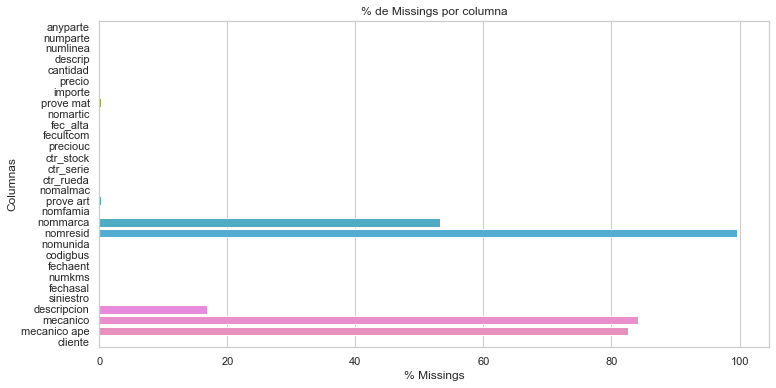

In [410]:
plot_miss(missing_taller)

consultamos lso tipos asignados por Pandas al dataframe

In [411]:
taller.dtypes

anyparte          int64
numparte          int64
numlinea          int64
descrip          object
cantidad        float64
precio          float64
importe         float64
prove mat        object
nomartic         object
fec_alta         object
fecultcom        object
preciouc        float64
ctr_stock         int64
ctr_serie         int64
ctr_rueda         int64
nomalmac         object
prove art        object
nomfamia         object
nommarca         object
nomresid         object
nomunida         object
codigbus         object
fechaent         object
numkms            int64
fechasal         object
siniestro         int64
descripcion      object
mecanico         object
mecanico ape     object
cliente          object
dtype: object

### Seleccionamos columnas
seleccioanmos las columnas


In [412]:
features_taller=['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art',
       'nomfamia', 'nomunida', 'codigbus', 'fechaent',
       'numkms', 'fechasal', 'siniestro', 'descripcion','cliente']
taller= taller[features_taller]

imputar 'Sin asignar' a los missings de las columnas prove mat','prove art','cliente','descripcion'
 y 0 a la columna preciouc

In [413]:
 

taller['preciouc']=np.where((taller['preciouc'].isna()) ,0, taller['preciouc'])

columnas=['prove mat','prove art','cliente','descripcion']
for columna in columnas:
    taller[columna]=np.where((taller['prove mat'].isna()) ,'SIN ASIGNAR', taller['prove mat'])



creamos una función para poder corregir los errores, que se han visto en las columnas de fechas en  ambos datasets.    
Esta función se ha ido actualizando para los errores que se han ido encontrando    
Como vamos a trabajar con fechas importamos datetime para poder asiganar el tipo fecha.

In [414]:
from datetime import datetime, timedelta

In [415]:

def norm_fecha (columna):

    fecha = columna.str.split(pat = '-', expand = True)
    
    # verificar si 0201 es 2001 o 2021
    fechas=[
            # añadidas para el data set taller para als 3 columnas
            ['0011','2011'],['0012','2012'],['2200','2020'],
            ['1948','2018'],['3200','2020'],['2200','2020'],
            ['2201','2021'],['3011','2011'],['2301','2021'],
            ['8201','2021'],['0201','2001'],['0212','2012'],
            ['1912','2012'],['9201','2021'],['2048','2018'],
            ['2047','2017'],['2107','2017'],['2044','2011'],
            ['2029','2020'],
            #añadidas para el data set vehiculo columna 'fechamat'
            #['0',np.nan],['65','1965'],['0000',np.nan],
            #['63','1963'],['59','1959'],['23','2022'],
            #['54','1954'],['0001','2001'],
        
            ['0',np.nan],['65',np.nan],['0000',np.nan],
            ['63',np.nan],['59',np.nan],['23',np.nan],
            ['54',np.nan],['0001','2001'],
            #añadidas para el data set vehiculo columna 'matriculacion_planner'
            ['34',np.nan],['19',np.nan],['43',np.nan],
            ['24',np.nan],['39',np.nan],['40',np.nan],
            ['55',np.nan],['25',np.nan],['50',np.nan],
            ['35',np.nan],['22',np.nan],['71',np.nan],
            ['53',np.nan],['61',np.nan],['47',np.nan],
            ['15',np.nan],['31',np.nan],['8',np.nan],
            ['12',np.nan],['9',np.nan],['18',np.nan],
            ['13',np.nan],['28',np.nan],['56',np.nan],
            ['26',np.nan],['4',np.nan],['5',np.nan]

           ]
    
    for f,f1 in fechas:
        fecha[0]=np.where((fecha[0]==f) ,f1, fecha[0])

    
    colum_fecha=fecha[0]+'-'+fecha[1]+'-'+fecha[2]     
    fecha_year=pd.unique(fecha[0])
    return  colum_fecha, fecha_year, fecha[0]


def cuentaNAN(fecha_a):
    fecha_b=pd.DataFrame(fecha_a[:1])
    fecha_b = fecha_b.transpose()
    print('Fechas')
    print(f'cantidad de registros: {fecha_b.count()}')
    print(f'cantidad de MISSINGS: {fecha_b.isna().sum()}')
    print(f'Porcentaje de MISSINGS: {fecha_b.isna().sum()/len(fecha_b)*100}')

verificamos los valores unicos de las columnas, fechas, pudiendo añadir los valores atipicos a la lista fechas de la función anterior

In [416]:
fecha_a= norm_fecha(taller['fec_alta'])
fecha_a[1]

array(['2012', '2010', '2009', '2011', '2007', '2008', '2013', '2019',
       '2006', '2020', '2021', '2001', '2018', '2014', '2017', '2015',
       '2016', '2005', '2004', '2003', '2022'], dtype=object)

In [417]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    189154
dtype: int64
cantidad de MISSINGS: 0    0
dtype: int64
Porcentaje de MISSINGS: 0    0.0
dtype: float64


In [418]:
taller['fec_alta']=fecha_a[0]
taller['fec_alta'] = pd.to_datetime(taller['fec_alta'], format='%Y-%m-%d')

In [419]:
fecha_a= norm_fecha(taller['fecultcom'])
fecha_a[1]

array(['2020', '2010', '2022', '2017', '2019', '2011', '2007', '2021',
       '2009', '2015', '2018', '2008', '2013', '2016', '2012', '2014',
       '2006', nan, '2001', '2005', '2004'], dtype=object)

In [420]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    188943
dtype: int64
cantidad de MISSINGS: 0    211
dtype: int64
Porcentaje de MISSINGS: 0    0.111549
dtype: float64


In [421]:
taller['fecultcom']=fecha_a[0]
taller['fecultcom'] = pd.to_datetime(taller['fecultcom'], format='%Y-%m-%d')

In [422]:
fecha_a= norm_fecha(taller['fechasal'])
fecha_a[1]

array(['2007', '2008', '2013', '2009', '2010', '2011', '2012', nan,
       '2014', '2021', '2015', '2016', '2017', '2018', '2019', '2020',
       '2022'], dtype=object)

In [423]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    189030
dtype: int64
cantidad de MISSINGS: 0    124
dtype: int64
Porcentaje de MISSINGS: 0    0.065555
dtype: float64


In [424]:
taller['fechasal']=fecha_a[0]
taller['fechasal'] = pd.to_datetime(taller['fechasal'], format='%Y-%m-%d')

In [425]:
fecha_a= norm_fecha(taller['fechaent'])
fecha_a[1]

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [426]:
cuentaNAN(fecha_a)

Fechas
cantidad de registros: 0    189154
dtype: int64
cantidad de MISSINGS: 0    0
dtype: int64
Porcentaje de MISSINGS: 0    0.0
dtype: float64


In [427]:
taller['fechaent']=fecha_a[0]
taller['fechaent'] = pd.to_datetime(taller['fechaent'], format='%Y-%m-%d')

In [428]:
#taller['anyparte'] = pd.to_datetime(taller['anyparte'], format='%Y')

In [429]:
taller.dtypes


anyparte                int64
numparte                int64
numlinea                int64
descrip                object
cantidad              float64
precio                float64
importe               float64
prove mat              object
nomartic               object
fec_alta       datetime64[ns]
fecultcom      datetime64[ns]
preciouc              float64
ctr_stock               int64
nomalmac               object
prove art              object
nomfamia               object
nomunida               object
codigbus               object
fechaent       datetime64[ns]
numkms                  int64
fechasal       datetime64[ns]
siniestro               int64
descripcion            object
cliente                object
dtype: object

In [430]:
fechas=taller.select_dtypes(include=np.datetime64)

col_date_taller=taller.select_dtypes(include=np.datetime64).columns.tolist()
col_date_taller


['fec_alta', 'fecultcom', 'fechaent', 'fechasal']

In [431]:
taller.isna().sum()/len(taller)*100

anyparte       0.000000
numparte       0.000000
numlinea       0.000000
descrip        0.000000
cantidad       0.000000
precio         0.000000
importe        0.000000
prove mat      0.000000
nomartic       0.000000
fec_alta       0.000000
fecultcom      0.111549
preciouc       0.000000
ctr_stock      0.000000
nomalmac       0.000000
prove art      0.000000
nomfamia       0.000000
nomunida       0.000000
codigbus       0.000000
fechaent       0.000000
numkms         0.000000
fechasal       0.065555
siniestro      0.000000
descripcion    0.000000
cliente        0.000000
dtype: float64

In [432]:
taller.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente'],
      dtype='object')

## Correlaciones
Creamos una función que  muestre las correlaciones ya que mas adelante la usaremos otra vez.

In [433]:
def correlaciones(df):
    sice_x=15 if len (df.columns) >30 else 10
    sice_y=10 if len (df.columns) >30 else 6
    plt.figure(figsize=(sice_x,  sice_y))
    # define the mask to set the values in the upper triangle to True
    mask = np.triu(np.ones_like(df.corr(), dtype=bool))
    heatmap = sns.heatmap(round(df.corr(),2), mask=mask, vmin=-1, vmax=1, annot=True, cmap='YlGnBu')
    heatmap.set_title('Triangulo de Correlaciones Heatmap', fontdict={'fontsize':18}, pad=16)

mostramos las correlaciones que hay en el dataset taller

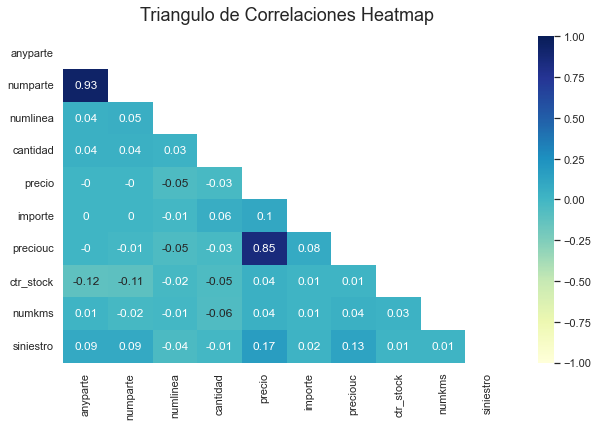

In [434]:
correlaciones(taller)

se peud eevr que las correlaciones mas destacables apra etse data set son  numparte con anyparte y precio con preciouc

Verificamos valores unicos para algunas de las columnas

In [435]:
pd.unique(taller['ctr_stock'])

array([0, 1], dtype=int64)

In [436]:
pd.unique(taller['anyparte'])

array([2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017,
       2018, 2019, 2020, 2021, 2022], dtype=int64)

In [437]:
pd.unique(taller['siniestro'])

array([0, 1], dtype=int64)

## Relaciones entre pares de variables

In [438]:
#sns.pairplot(taller, hue='nomfamia')
#plt.show()

# Analisis Dataset VEHICULOS

In [439]:
print(vehiculo.shape)
vehiculo.sample(5)


(1532, 38)


,id_vehiculo,codigbus,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,bastidor,capacidad,paxdepie,paxsentados,paxpmr,plat_pmr,WC,autoport,marca,modelo,carrocero,categoria,clase,longitud,numcv,tara,cilindrada,potencia,nvl_emisiones,escolar,tipo,subtipo,uso,tall_kilom,tal_feckm,totkilom,activo,dns_vehiculo,dispositivo,combustible
864,763.0,30197,9805HZP,2014-10-14,2014-10-14,8.0,92,Ambulancias Autónomas,WDB9066331S881539,7,0,0,0,NaN,NaN,NaN,MERCEDES BENZ,SPRINTER,INDUSAUTO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,AMBULANCIA TIPO C,U.C.I.,NaN,138980.0,2017-03-01 00:00:00,0.0,1.0,ambulancias,NaN,NaN
174,142.0,I033,R.YCAJAL,0001-01-01,NaN,NaN,17,INTERCAVE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
606,516.0,AVS0155,7949DMS,2005-07-12,2005-07-12,16.0,79,AVSA,WEB63422011000024,85,45,39,1,Si,No,No,MERCEDES BENZ,HABIT,TATA HISPANO,NaN,II,12.80,NaN,11720,11967,220,NaN,Si,Urbano,Normal,NaN,NaN,NaN,0.0,1.0,avsa,NaN,Diésel
270,223.0,T336,1325KDM,2017-10-05,2017-10-05,5.0,2,Transvia,WDB9061551N716488,19,0,19,0,NaN,No,Si,MERCEDES BENZ,SPICA,MERCEDES BENZ,M3,B,7.74,NaN,3900,2987,140,EURO VI C,Si,Discrecional,Microbus,NaN,2498.0,2017-10-24 00:00:00,1089626.0,1.0,transvia,560,Diésel
422,353.0,H107,9178GYN,2010-09-09,2010-09-09,12.0,44,Herca,WDB9066571S477570,8,0,2,6,Si,No,No,MERCEDES BENZ,CORVIS,CARBUS,NaN,B,7.35,NaN,3700,2143,120,NaN,Si,Discrecional,Microbus,NaN,388300.0,2017-11-17 00:00:00,2443164.0,1.0,bunyol,NaN,Diésel


Buscamos duplicados y los eliminamos

In [440]:
print(vehiculo.duplicated().sum())

34


In [441]:
vehiculo=vehiculo.drop_duplicates()

In [442]:
print(vehiculo.duplicated().sum())

0


## Missing
observamos los missings y los graficamos

In [443]:
missing_vehiculo=vehiculo.isna().sum()/len(taller)*100
missing_vehiculo=pd.DataFrame(missing_vehiculo)
missing_vehiculo

,0
id_vehiculo,0.057096
codigbus,0.006873
matricul,0.013745
fechamat,0.069256
matriculacion_planner,0.075600
edad,0.080358
numempre,0.048638
nomempre,0.052867
bastidor,0.192436
capacidad,0.213054


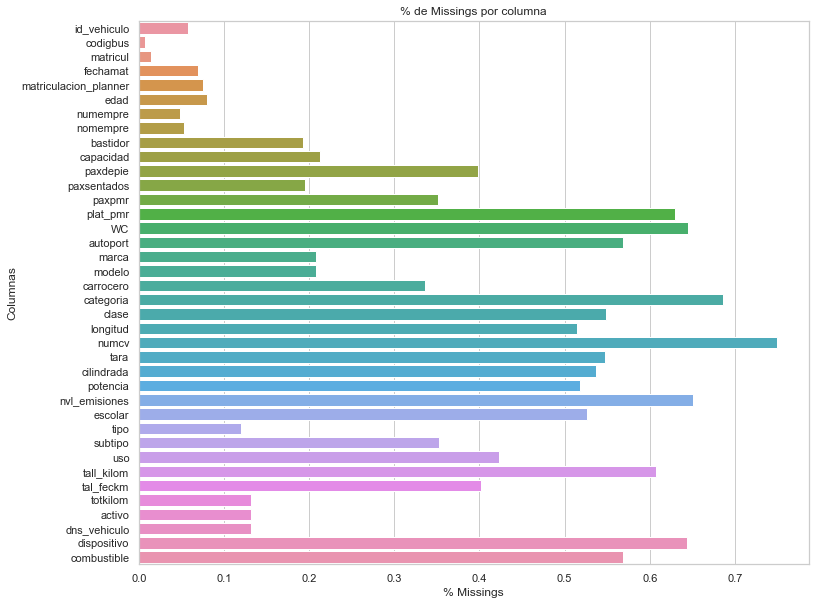

In [444]:
plot_miss(missing_vehiculo)

vemos los tipos  que asignado pandas a cada columna

In [445]:
vehiculo.dtypes

id_vehiculo              float64
codigbus                  object
matricul                  object
fechamat                  object
matriculacion_planner     object
edad                     float64
numempre                  object
nomempre                  object
bastidor                  object
capacidad                 object
paxdepie                  object
paxsentados               object
paxpmr                    object
plat_pmr                  object
WC                        object
autoport                  object
marca                     object
modelo                    object
carrocero                 object
categoria                 object
clase                     object
longitud                  object
numcv                     object
tara                      object
cilindrada                object
potencia                  object
nvl_emisiones             object
escolar                   object
tipo                      object
subtipo                   object
uso       

### Seleccion de columnas

elegimos las caracteristicas que nos interesan

In [446]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'bastidor',
       'capacidad', 'paxdepie', 'paxsentados', 'paxpmr', 'plat_pmr', 'WC',
       'autoport', 'marca', 'modelo', 'carrocero', 'categoria', 'clase',
       'longitud', 'numcv', 'tara', 'cilindrada', 'potencia', 'nvl_emisiones',
       'escolar', 'tipo', 'subtipo', 'uso', 'tall_kilom', 'tal_feckm',
       'totkilom', 'activo', 'dns_vehiculo', 'dispositivo', 'combustible'],
      dtype='object')

In [447]:
features_vehiculos=['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 
       'marca', 'modelo', 'carrocero','tipo',
       'totkilom', 'dns_vehiculo']

In [448]:
vehiculo= vehiculo[features_vehiculos]

eliminar  missings de id vehiculo, y codigbus , e imputar 'sin asignar' al resto

In [449]:
#vehiculo = vehiculo.dropna(subset=['codigbus'])
vehiculo = vehiculo[vehiculo['codigbus'].notna()]
vehiculo = vehiculo[vehiculo['id_vehiculo'].notna()]
#vehiculo = vehiculo[vehiculo[['id_vehiculo','codigbus']].notna()]

In [450]:
pd.unique(vehiculo['numempre'])

array(['3', '19', '2', '31', '4', '6', '10', '17', '15', '8', '16', '43',
       '45', '44', '46', '47', '67', '69', '70', '68', '57', '72', '79',
       '80', '83', '84', '93', '92', '94', '96', '95', '97', '120', '121',
       '117', '138', '135', '139', '140'], dtype=object)

In [451]:
vehiculo.shape

(1390, 14)

In [452]:
vehiculo.dtypes

id_vehiculo              float64
codigbus                  object
matricul                  object
fechamat                  object
matriculacion_planner     object
edad                     float64
numempre                  object
nomempre                  object
marca                     object
modelo                    object
carrocero                 object
tipo                      object
totkilom                 float64
dns_vehiculo              object
dtype: object

asiganamos el valor -1 para los missings de 'edad', 'numempre', 'totkilom'

asiganamos el 'sin registro' para los missings de 'matricul','nomempre', 'marca','modelo', 'carrocero', 'tipo', 'dns_vehiculo'

In [453]:
#vehiculo['id_vehiculo']=np.where((vehiculo['id_vehiculo'].isna()) ,0, vehiculo['id_vehiculo'])

columnas=[ 'edad', 'numempre', 'totkilom']
for columna in columnas : 
    vehiculo[columna]=np.where((vehiculo[columna].isna()) ,-1, vehiculo[columna])

#palabras=['ZARAG','Si','No']
#for palabra in palabras:
#    vehiculo['numempre']=np.where((vehiculo['numempre'].str.contains(palabra)) ,-1, vehiculo['numempre'])
#vehiculo['numempre'] = vehiculo['numempre'].astype(float)

columnas=[ 'matricul','nomempre', 'marca','modelo', 'carrocero', 'tipo', 'dns_vehiculo']
for columna in columnas :   
    vehiculo[columna]=np.where((vehiculo[columna].isna()) ,'SIN ASIGNAR', vehiculo[columna])


In [454]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

comprobamos valores unicos, que tengan sentido

In [455]:
pd.unique(vehiculo['edad'])

array([ 3.,  6.,  5.,  7., 14.,  8., 18., 12., 19., -1., 16., 13.,  9.,
        4., 11., 10., 29., 20., 32., 30., 73., 64., 44., 43., 22., 17.,
       15., 31., 25., 38., 27., 42., 39., 63., 21., 34., 28., 24.,  2.,
        1., 26., 23.,  0., 37., 40.])

In [456]:
vehiculo.isna().sum()/len(taller)*100

id_vehiculo              0.000000
codigbus                 0.000000
matricul                 0.000000
fechamat                 0.054453
matriculacion_planner    0.063969
edad                     0.000000
numempre                 0.000000
nomempre                 0.000000
marca                    0.000000
modelo                   0.000000
carrocero                0.000000
tipo                     0.000000
totkilom                 0.000000
dns_vehiculo             0.000000
dtype: float64

vemos que hay matriculas que no correspondenal formato de una matricula y que hay matriculas de diferentes formatos

In [457]:
vehiculo['matricul'].tail(30)

1502    6269KLH
1503    5791KLS
1504    3252KRB
1505        FVL
1506    7371LXF
1507    7122LXD
1508    8440CBC
1509    7238GYM
1510    8456HKM
1511    3459HRG
1512    2533HMG
1513    7794DXW
1514    2535HMG
1515    3277HMG
1516      RIZAO
1517    5290BKY
1518    6583FDL
1519    6792GTW
1520    7156FYC
1521    1663GZJ
1522    6652JVL
1523    5791KLS
1524    7156FYC
1525    4794JJH
1526    7140LYB
1527    6312FZT
1528    1694HNR
1529    8156JWS
1530    1983HST
1531    7140LYB
Name: matricul, dtype: object

creamos un filtro que deja las matricuals  que son alfanumericas en las posiciones designadas que coinciden con los dos tipos de formatos de matricula que se ha visto en el datase

tipo 1 : X0000XX    
tipo 2 : 0000XXX

In [458]:
vehiculo['matricul']=np.where((vehiculo['matricul'].str[1:-3].str.isnumeric() & 
                               vehiculo['matricul'].str[-2:].str.isalpha())
                              ,vehiculo['matricul'],'SIN ASIGNAR')

In [459]:
vehiculo['matricul'].tail(30)

1502        6269KLH
1503        5791KLS
1504        3252KRB
1505    SIN ASIGNAR
1506        7371LXF
1507        7122LXD
1508        8440CBC
1509        7238GYM
1510        8456HKM
1511        3459HRG
1512        2533HMG
1513        7794DXW
1514        2535HMG
1515        3277HMG
1516    SIN ASIGNAR
1517        5290BKY
1518        6583FDL
1519        6792GTW
1520        7156FYC
1521        1663GZJ
1522        6652JVL
1523        5791KLS
1524        7156FYC
1525        4794JJH
1526        7140LYB
1527        6312FZT
1528        1694HNR
1529        8156JWS
1530        1983HST
1531        7140LYB
Name: matricul, dtype: object

pasamos la función anteriormente creada para las columnas de fechas, añadiendo a la lista las fechas que corresponda 

In [460]:
fecha_a= norm_fecha(vehiculo['fechamat'])
fecha_a[1]

array(['2019', '2016', '2017', '2015', '2008', '2014', '2004', '2010',
       '2003', nan, '2006', '2009', '2013', '2018', '2011', '2012',
       '1993', '2002', '1990', '1992', '1949', '1958', '1978', '1979',
       '2000', '2001', '2005', '2007', '1991', '1997', '1984', '1995',
       '1980', '1983', '1959', '1988', '1994', '1998', '2020', '1996',
       '1999', '2021', '1985', '1982', '2022'], dtype=object)

In [461]:
cuentaNAN(fecha_a)    

Fechas
cantidad de registros: 0    1286
dtype: int64
cantidad de MISSINGS: 0    104
dtype: int64
Porcentaje de MISSINGS: 0    7.482014
dtype: float64


asignamos los valores modificados a la columna de fecha y le asignamos el typo fecha

In [462]:
vehiculo['fechamat']=fecha_a[0]
vehiculo['fechamat'] = pd.to_datetime(vehiculo['fechamat'], format='%Y-%m-%d')

In [463]:
pd.unique(vehiculo['numempre'])

array(['3', '19', '2', '31', '4', '6', '10', '17', '15', '8', '16', '43',
       '45', '44', '46', '47', '67', '69', '70', '68', '57', '72', '79',
       '80', '83', '84', '93', '92', '94', '96', '95', '97', '120', '121',
       '117', '138', '135', '139', '140'], dtype=object)

In [464]:
fecha_a= norm_fecha(vehiculo['matriculacion_planner'])
fecha_a[1]

array(['2019', '2016', '2017', '2015', '2008', '2014', '2004', '2010',
       '2003', nan, '2006', '2009', '2013', '2018', '2011', '2012',
       '1993', '2002', '1990', '1992', '1949', '1958', '1978', '1979',
       '2000', '2005', '2007', '1991', '1997', '1984', '1995', '1980',
       '1983', '1959', '2001', '1988', '1994', '1998', '2020', '1996',
       '1999', '2021', '1985', '1982', '2022'], dtype=object)

In [465]:
cuentaNAN(fecha_a) 

Fechas
cantidad de registros: 0    1269
dtype: int64
cantidad de MISSINGS: 0    121
dtype: int64
Porcentaje de MISSINGS: 0    8.705036
dtype: float64


asignamos los valores modificados a la columna de fecha y le asignamos el typo fecha

In [466]:
vehiculo['matriculacion_planner']=fecha_a[0]
vehiculo['matriculacion_planner'] = pd.to_datetime(vehiculo['matriculacion_planner'], format='%Y-%m-%d')

In [467]:
fechas=vehiculo.select_dtypes(include=np.datetime64)

col_date=vehiculo.select_dtypes(include=np.datetime64).columns.tolist()
col_date

['fechamat', 'matriculacion_planner']

comprobamos que los tipos son lso correctos

In [468]:
vehiculo.dtypes

id_vehiculo                     float64
codigbus                         object
matricul                         object
fechamat                 datetime64[ns]
matriculacion_planner    datetime64[ns]
edad                            float64
numempre                         object
nomempre                         object
marca                            object
modelo                           object
carrocero                        object
tipo                             object
totkilom                        float64
dns_vehiculo                     object
dtype: object

In [469]:
vehiculo.isna().sum()/len(taller)*100

id_vehiculo              0.000000
codigbus                 0.000000
matricul                 0.000000
fechamat                 0.054982
matriculacion_planner    0.063969
edad                     0.000000
numempre                 0.000000
nomempre                 0.000000
marca                    0.000000
modelo                   0.000000
carrocero                0.000000
tipo                     0.000000
totkilom                 0.000000
dns_vehiculo             0.000000
dtype: float64

In [470]:
vehiculo.sample(5)

,id_vehiculo,codigbus,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo
255,208.0,T298,3621GDY,2008-05-28,2008-05-28,14.0,2,Transvia,IVECO,MIDI STAR,BEULAS,Discrecional,2735448.0,transvia
87,88.0,A109,0723GJR,2008-11-24,2008-11-24,14.0,4,Cave Talleres,TEMSA,OPALIN 8.4,SIN ASIGNAR,MICROBUS,2794384.0,transvia
1053,945.0,M055,4340CRW,2004-02-03,2004-02-04,17.0,120,Magallon,MAN,TOURING,NOGE,Discrecional,176403.0,maganeto
1344,1222.0,T368,2894JFK,2015-05-12,2015-05-12,7.0,2,Transvia,SIN ASIGNAR,SIN ASIGNAR,IRIZAR,NORMAL,479726.0,transvia
1282,1161.0,577O,9825LDD,2019-12-16,2019-12-16,3.0,19,Empleadas de Hogar,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,TURISMO,0.0,transvia


comprobamos las correlaciones que hay en el data set vehiculo, vemos que no son muy altes

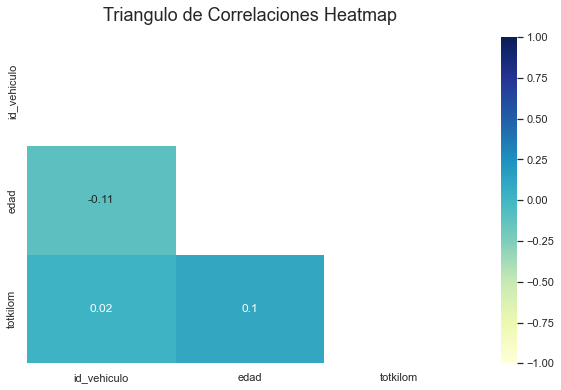

In [471]:
correlaciones(vehiculo)

# COMBINAR Datasets

comprobamos que las columnas por las que vamos a juntar los data sets  tienen valores iguales

In [472]:
codigbus_taller = pd.unique(taller['codigbus'])
print(len(codigbus_taller))
print(type(codigbus_taller))

1327
<class 'numpy.ndarray'>


In [473]:
codigbus_vehiculo = pd.unique(vehiculo['codigbus'])
print(len(codigbus_vehiculo))

1373


In [474]:
print(codigbus_taller)
print(codigbus_vehiculo)

['B078' 'B128' 'B131' ... 'T376' 'T379' 'RMA108']
['1000' '1001' '1002' ... 'T380' 'B191' 'R104']


In [475]:
codigbus_taller=pd.Series(codigbus_taller)
codigbus_taller.isna().sum()

0

In [476]:
codigbus_vehiculo=pd.Series(codigbus_vehiculo)
codigbus_vehiculo.isna().sum()

0

In [477]:
#codigbus_vehiculo=codigbus_vehiculo.dropna()
#codigbus_vehiculo.isna().sum()

In [478]:
codigbus_comun=np.intersect1d(codigbus_taller,codigbus_vehiculo)
codigbus_comun

array(['20052', '20063', '222', '236', '23LT', '30178', '30185', '30252',
       '30295', '54HC', '58HC', '61HC', '63HC', '63LT', '66LT', '67HC',
       '69HC', '70HC', '71HC', '72HC', '73HC', '75HC', '76HC', '77HC',
       '78HC', '79HC', '80HC', '81HC', '82HC', '83HC', '84HC', 'A102',
       'A107', 'A109', 'A110', 'A114', 'A115', 'A124', 'A125', 'A358',
       'B009', 'B011', 'B114', 'B116', 'B117', 'B119', 'B127', 'B129',
       'B130', 'B132', 'B133', 'B135', 'B137', 'B145', 'B146', 'B148',
       'B150', 'B152', 'B153', 'B155', 'B156', 'B158', 'B160', 'B161',
       'B162', 'B164', 'B165', 'B166', 'B168', 'B169', 'B170', 'B171',
       'B172', 'B173', 'B174', 'B175', 'B176', 'B177', 'B178', 'B179',
       'B180', 'B181', 'B182', 'B183', 'B184', 'B185', 'B186', 'B187',
       'B188', 'B189', 'B191', 'C084', 'C086', 'C087', 'C088', 'C091',
       'C092', 'C094', 'C095', 'C098', 'C099', 'C101', 'C102', 'C103',
       'C104', 'C105', 'C106', 'C107', 'C108', 'C109', 'D101', 'D112',
  

comprobamos que las columnas por las que vamos a juntar los data sets  tienes valores iguales

vemos que el número de observaciones comunes:

In [479]:
#len(np.intersect1d(codigbus_taller,codigbus_vehiculo))
len(codigbus_comun)

479

In [480]:
taller.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente'],
      dtype='object')

In [481]:
vehiculo.columns

Index(['id_vehiculo', 'codigbus', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

hacemos un inner join  para tener las filas con toda la información

In [482]:
#df= taller.merge(vehiculo, how='left', on='codigbus')
df= taller.merge(vehiculo, how='inner', on='codigbus')
print(df.shape)



(99282, 37)


In [483]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo'],
      dtype='object')

In [484]:
#df4=df4.sort_values()
df=df[(df['importe'] > 0)]
df.shape

(97848, 37)

In [485]:
df['importe_teorico']=round(df.cantidad*df.precio,2)
df['descuento']=df.importe_teorico-df.importe

In [486]:
df[['nomartic','cantidad','precio','importe', 'importe_teorico','descuento']][df['descuento']<0].sample(10)

,nomartic,cantidad,precio,importe,importe_teorico,descuento
10125,EXTINTORES,2.00,10.2100,20.43,20.42,-0.01
80460,ART.5 APTO.11.1 EPIG.1.8 R-134a LEY 16/2013,0.50,21.4500,10.73,10.72,-0.01
9233,EXTINTORES,2.00,7.4225,14.85,14.84,-0.01
12837,EXTINTORES,2.00,9.6100,19.23,19.22,-0.01
14335,ESPARRAGOS TURBO MAN,6.00,1.4600,8.78,8.76,-0.02
27742,"CAJA CONEX.6 VIA TERM.FASTON-H 6,3MM",1.25,0.2600,0.33,0.32,-0.01
39550,ANILLO JUNTA 11.5X3-FPM-70 MAN,6.00,3.1100,18.68,18.66,-0.02
28761,BARPSINT ESMALTE MATE NEGRO B-750,3.00,7.5300,22.60,22.59,-0.01
22359,ELECTRONICA MOTOR CONDENSADOR 85,3.00,77.0300,231.10,231.09,-0.01
31028,SPRAY 400 ML CARS LLANTAS PLATA,4.00,8.8300,35.33,35.32,-0.01


In [487]:
df['importe']=np.where((df['descuento']<0) ,df['importe_teorico'], df['importe'])
df['descuento']=df.importe_teorico-df.importe
df[['nomartic','cantidad','precio','importe', 'importe_teorico','descuento']][df['descuento']<0]

,nomartic,cantidad,precio,importe,importe_teorico,descuento


In [488]:
df[['nomartic','cantidad','precio','importe', 'importe_teorico','descuento']][df['cantidad']<1].sample(30)

,nomartic,cantidad,precio,importe,importe_teorico,descuento
78391,SUSTITUIR TUBERIAS DE DISTRIBUCION VOLVO,0.60,64.9000,35.05,38.94,3.89
82874,D + M 2 PASTILLAS Y DISCOS FRENO TRA. TODOS,0.90,59.9000,51.21,53.91,2.70
88295,SUSTITUCION 1 BOMBILLA DE FARO,0.40,54.0000,20.52,21.60,1.08
90085,RENOVAR SENSOR DE PARTICULAR HOLLIN TRAS CATAL...,0.80,38.0000,30.40,30.40,0.00
78434,CONTROL DE DESGASTE,0.10,58.4100,5.84,5.84,0.00
87507,COMPROBACIONES DEL SISTEMA DE ESCAPE,0.50,59.9000,28.45,29.95,1.50
84084,CONTROL DE DESGASTE,0.10,62.9000,5.66,6.29,0.63
93438,(NP4) CONEX/COMUN HERRAMIENTA DIAGNOSIS,0.50,59.9000,28.45,29.95,1.50
81731,CONEXION HERRAMIENTA DIAGNOSIS,0.60,45.9000,27.54,27.54,0.00
71072,PVC ESPUMA BLANCA CH/15 MM.,0.64,36.8593,23.59,23.59,0.00


In [489]:
df['cantidad'][df['cantidad']<1].unique()

array([0.5 , 0.06, 0.35, 0.2 , 0.1 , 0.6 , 0.55, 0.25, 0.9 , 0.4 , 0.79,
       0.3 , 0.76, 0.75, 0.15, 0.62, 0.7 , 0.8 , 0.13, 0.66, 0.81, 0.05,
       0.58, 0.37, 0.64, 0.12, 0.49, 0.39, 0.31, 0.57, 0.11, 0.07, 0.83,
       0.72])

In [490]:
df.isna().sum()/len(df)*100


anyparte                 0.000000
numparte                 0.000000
numlinea                 0.000000
descrip                  0.000000
cantidad                 0.000000
precio                   0.000000
importe                  0.000000
prove mat                0.000000
nomartic                 0.000000
fec_alta                 0.000000
fecultcom                0.142057
preciouc                 0.000000
ctr_stock                0.000000
nomalmac                 0.000000
prove art                0.000000
nomfamia                 0.000000
nomunida                 0.000000
codigbus                 0.000000
fechaent                 0.000000
numkms                   0.000000
fechasal                 0.083803
siniestro                0.000000
descripcion              0.000000
cliente                  0.000000
id_vehiculo              0.000000
matricul                 0.000000
fechamat                 4.335296
matriculacion_planner    3.977598
edad                     0.000000
numempre      

In [491]:
df.dtypes

anyparte                          int64
numparte                          int64
numlinea                          int64
descrip                          object
cantidad                        float64
precio                          float64
importe                         float64
prove mat                        object
nomartic                         object
fec_alta                 datetime64[ns]
fecultcom                datetime64[ns]
preciouc                        float64
ctr_stock                         int64
nomalmac                         object
prove art                        object
nomfamia                         object
nomunida                         object
codigbus                         object
fechaent                 datetime64[ns]
numkms                            int64
fechasal                 datetime64[ns]
siniestro                         int64
descripcion                      object
cliente                          object
id_vehiculo                     float64


In [492]:
df.importe.describe()

count    9.784800e+04
mean     1.342815e+02
std      3.595113e+03
min      1.000000e-02
25%      1.450000e+01
50%      3.967000e+01
75%      1.138100e+02
max      1.119894e+06
Name: importe, dtype: float64

In [493]:
df[df.importe==df.importe.min()]

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo,importe_teorico,descuento
169,2013,131484,2,VALVULA FINAL CARRERA T4 2 VIAS,1.00,0.01,0.01,"SUMINISTROS HYDRACO, S.L.",VALVULA FINAL CARRERA T4 2 VIAS,2013-08-01,2013-08-01,-0.004,1,ALMACEN QUART,"SUMINISTROS HYDRACO, S.L.",BOMBAS AGUA Y VALVULAS,UNIDADES,B114,2013-03-16,866808,2013-03-20,0,"SUMINISTROS HYDRACO, S.L.","SUMINISTROS HYDRACO, S.L.",1348.0,3570BSX,2002-02-20,2002-02-20,20.0,43,Buñol,MAN,18310,SIN ASIGNAR,URBANO,2000000.0,bunyol,0.01,0.0
12873,2012,121522,15,LOCTITE 5980 QUICK GASKET 200ML,1.00,0.01,0.01,"MINGUEZ, S.A.",LOCTITE 5980 QUICK GASKET 200ML,2012-03-14,2012-03-14,0.010,0,ALMACEN QUART,"MINGUEZ, S.A.",PRODUCTOS QUIMICOS,UNIDADES,T227,2012-03-12,663098,2012-03-20,0,"MINGUEZ, S.A.","MINGUEZ, S.A.",200.0,8460CGZ,2003-04-25,2003-04-25,19.0,2,Transvia,MERCEDES BENZ,TOURING,NOGE,Discrecional,2056549.0,transvia,0.01,0.0
44913,2021,2107260,5,GESTIÓN RESIDUO SEGÚN RD 106/2008,1.00,0.01,0.01,"SUMINISTROS NAVARRO, S.A.",GESTIÓN RESIDUO SEGÚN RD 106/2008,2015-02-16,2021-10-04,0.120,0,ALMACEN QUART,"SUMINISTROS NAVARRO, S.A.",VARIOS,UNIDADES,B146,2021-10-05,608880,2021-10-05,0,"SUMINISTROS NAVARRO, S.A.","SUMINISTROS NAVARRO, S.A.",289.0,7488FFV,2006-09-21,2010-03-30,12.0,43,Buñol,MERCEDES BENZ,SPRINTER,MERCEDES BENZ,Discrecional,579416.0,bunyol,0.01,0.0
48627,2013,134350,35,ANTICONGELANTE MINGUEZ 30% ORGAN.5L,1.00,0.01,0.01,"MINGUEZ, S.A.",ANTICONGELANTE MINGUEZ 30% ORGAN.5L,2013-03-14,2016-11-16,4.580,1,ALMACEN QUART,"MINGUEZ, S.A.",ACEITES Y LUBRICANTES,UNIDADES,J289,2013-08-07,328000,2013-10-17,0,"MINGUEZ, S.A.","MINGUEZ, S.A.",152.0,8569FXC,2007-11-06,2007-11-06,15.0,8,HOSOJU,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,0.01,0.0
60107,2014,140048,1,VARIOS ALMACEN,1.00,0.01,0.01,"TOP RECAMBIOS, S.L.",VARIOS ALMACEN,2012-07-02,2020-08-11,12.950,0,ALMACEN QUART,"TOP RECAMBIOS, S.L.",VARIOS,UNIDADES,I711,2014-01-07,743000,2014-01-07,0,"TOP RECAMBIOS, S.L.","TOP RECAMBIOS, S.L.",988.0,V5475FN,1997-02-10,1997-02-10,25.0,46,Travicoi,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,0.01,0.0
63562,2020,2002890,15,SISTEMA INTEGRT GESTIO OLI,0.15,0.06,0.01,"TALLERS RIBALAIGA, S.A.",SISTEMA INTEGRT GESTIO OLI,2020-03-29,2020-03-27,0.060,0,ALMACEN QUART,"TALLERS RIBALAIGA, S.A.",RESIDUOS,UNIDADES,70HC,2020-02-27,591256,2020-02-27,0,"TALLERS RIBALAIGA, S.A.","TALLERS RIBALAIGA, S.A.",859.0,6235HXL,2014-05-28,2014-05-28,8.0,96,La Hispano Chelvana,MAN,i6 15.37,IRIZAR,Discrecional,2512288.0,fernanbus,0.01,0.0
68293,2016,1603358,2,FILM.LASER LARGA 520 X 110,1.00,0.01,0.01,"AUTO RECAMBIOS VILBER, S.L.",FILM.LASER LARGA 520 X 110,2014-09-08,2017-02-07,0.010,1,ALMACEN QUART,"AUTO RECAMBIOS VILBER, S.L.",CARROCERIA,UNIDADES,D314,2016-05-03,50699,2016-05-05,0,"AUTO RECAMBIOS VILBER, S.L.","AUTO RECAMBIOS VILBER, S.L.",98.0,3876JHW,2015-09-08,2015-09-08,7.0,6,Medtrast,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,0.01,0.0


In [494]:
#df4=df4.sort_values()
df[df['importe']>10000]

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo,importe_teorico,descuento
27536,2019,1901561,2,VÁLVULA PROPORCIONAL RETEARDER R133/2,1183.0,946.656,1119894.05,"AUTOSUR DE LEVANTE, S.A.",VÁLVULA PROPORCIONAL RETEARDER R133/2,2014-11-03,2019-02-18,946.6560,1,ALMACEN QUART,"AUTOSUR DE LEVANTE, S.A.",MATERIAL CAJAS CAMBIO,UNIDADES,J264,2019-02-25,867925,2019-02-25,0,"AUTOSUR DE LEVANTE, S.A.","AUTOSUR DE LEVANTE, S.A.",147.0,4242CFV,2003-03-13,2003-03-13,19.0,8,HOSOJU,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,1119894.05,0.00
62973,2021,2102554,1,REPARAR MOTOR CONSUMO DE ACEITE,1.0,10203.000,10203.00,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",REPARAR MOTOR CONSUMO DE ACEITE,2021-01-07,2021-02-25,5997.2700,0,ALMACEN QUART,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",MANO DE OBRA,UNIDADES,H114,2021-03-31,558649,2021-03-31,0,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL","MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",356.0,1411HXF,2014-05-13,2014-05-13,8.0,44,Herca,MAN,i6 15.37,IRIZAR,Discrecional,2454157.0,bunyol,10203.00,0.00
67422,2020,2002900,1,CAMBIAR DOS TURBOS EN ALEMANIA,1.0,12200.770,12200.77,MAN TRUCK BUS DEUTSCHLAND GMBH,CAMBIAR DOS TURBOS EN ALEMANIA,2020-03-29,2019-07-31,12200.7700,0,ALMACEN QUART,MAN TRUCK BUS DEUTSCHLAND GMBH,MANO DE OBRA,UNIDADES,T309,2020-03-29,463029,2020-03-29,0,MAN TRUCK BUS DEUTSCHLAND GMBH,MAN TRUCK BUS DEUTSCHLAND GMBH,214.0,2351JCV,2015-02-25,2015-02-25,7.0,2,Transvia,MAN,i6 15.37,IRIZAR,Discrecional,2368291.0,transvia,12200.77,0.00
71349,2019,1908962,1,REPARACIÓN MOTOR,1.0,47629.250,47629.25,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",REPARACIÓN MOTOR,2019-09-24,2019-08-07,7845.0100,0,ALMACEN QUART,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",MANO DE OBRA,UNIDADES,F202,2019-09-24,294200,2019-09-25,0,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL","MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",903.0,5370JLB,2016-01-05,2016-01-05,6.0,95,Fernanbus,MAN,MAGNUS,CASTROSUA,Urbano,294200.0,fernanbus,47629.25,0.00
72674,2019,1911048,18,MOTOR DIESEL MERCEDES,1.0,11981.950,11143.21,MERCEDES-BENZ VALENCIA,MOTOR DIESEL MERCEDES,2019-12-17,2019-12-17,11143.2135,1,ALMACEN QUART,MERCEDES-BENZ VALENCIA,ELEMENTOS MOTOR,UNIDADES,E641,2019-11-13,419718,2019-12-20,0,MERCEDES-BENZ VALENCIA,MERCEDES-BENZ VALENCIA,109.0,7078JLG,2016-01-20,2016-01-20,6.0,10,Autos Diamond,MERCEDES BENZ,E 220 BLUETEC,SIN ASIGNAR,TURISMO,2295196.0,transvia,11981.95,838.74
84919,2021,2109518,1,REVISAR FALLO MOTOR,1.0,20642.870,20642.87,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",REVISAR FALLO MOTOR,2015-06-24,2022-02-08,6192.8600,0,ALMACEN QUART,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",MANO DE OBRA,UNIDADES,G084,2021-12-16,246871,2021-12-16,0,"MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL","MAN TRUCK & BUS IBERIA, S.A. UNIPERSONAL",497.0,1745KDL,2017-10-03,2017-10-03,5.0,72,La Marina Gandiense,MAN,MAGNUS,CASTROSUA,Urbano,2065100.0,lamarina,20642.87,0.00


In [495]:
#df4=df.groupby('codigbus')['codigbus'].count()
#df4=df4.sort_values()
df[['cantidad','precio','importe']][(df['importe'] > 0)]


,cantidad,precio,importe
0,1.0,60.72,51.61
1,1.0,16.81,16.81
2,1.0,28.85,24.52
3,1.0,168.24,109.36
4,1.0,22.01,14.31
...,...,...,...
99277,1.0,82.00,82.00
99278,1.0,45.42,45.42
99279,7.0,21.45,150.15
99280,2.0,133.80,267.60


In [496]:
df[(df['precio'] <= 0)]

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo,importe_teorico,descuento


In [497]:
df.sample(5)

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo,importe_teorico,descuento
5664,2011,114163,7,PORTES,1.0,28.00,28.00,SIN ASIGNAR,PORTES,2013-03-07,2022-06-08,12.000,1,ALMACEN QUART,SIN ASIGNAR,VARIOS,UNIDADES,I707,2011-08-29,714404,2011-09-08,0,SIN ASIGNAR,SIN ASIGNAR,368.0,4288FHW,2006-11-27,2006-11-27,16.0,46,Travicoi,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,28.00,0.0
942,2012,120404,1,FILTRO AIRE,1.0,55.00,55.00,EUROPART,FILTRO AIRE,2012-01-24,2012-01-24,55.000,1,ALMACEN QUART,EUROPART,FILTROS,UNIDADES,T237,2012-01-24,722746,2012-01-24,0,EUROPART,EUROPART,956.0,3568JPP,2007-08-03,2007-08-03,15.0,117,Transvia Toledo,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,AUTOBUS,2915353.0,tviacentro,55.00,0.0
80380,2022,2204388,5,FILTRO AIRE MERCEDES DONALSON,1.0,55.00,55.00,"CBM IBERICA, S.L.",FILTRO AIRE MERCEDES DONALSON,2018-06-05,2022-05-11,64.980,1,ALMACEN QUART,"CBM IBERICA, S.L.",FILTROS,UNIDADES,H124,2022-05-23,377900,2022-05-24,0,"CBM IBERICA, S.L.","CBM IBERICA, S.L.",361.0,1755JYG,2017-04-10,2017-04-10,5.0,44,Herca,DAF,i6 13.37,IRIZAR,Discrecional,2165660.0,bunyol,55.00,0.0
75497,2021,2105225,6,CORREA (KING LNG),1.0,89.07,89.07,KING LONG BUSES ESPAÑA,CORREA (KING LNG),2018-02-15,2022-05-05,82.848,1,ALMACEN QUART,KING LONG BUSES ESPAÑA,CORREAS,UNIDADES,X118,2021-07-14,365400,2021-07-15,0,KING LONG BUSES ESPAÑA,KING LONG BUSES ESPAÑA,378.0,8832JSM,2016-09-07,2016-09-07,6.0,47,Starbus,CUMMINS,C10,KING LONG,Discrecional,2171143.0,bunyol,89.07,0.0
29504,2008,82197,1,SECADOR HALDEX SCANIA,1.0,495.00,495.00,EUROPART,SECADOR HALDEX SCANIA,2012-10-17,2012-10-17,525.000,1,ALMACEN QUART,EUROPART,VARIOS,UNIDADES,F125,2008-04-15,0,2008-04-28,0,EUROPART,EUROPART,882.0,5201CVP,2004-04-30,2004-04-30,18.0,95,Fernanbus,SCANIA,CS40 CITY II,CASTROSUA,Urbano,2247560.0,fernanbus,495.00,0.0


comprobamos duplicados, aunque no debería haber ya que se ha comprobado en los dataset que hemos juntado

In [498]:
df[(df['importe'] == 0.01)]

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo,importe_teorico,descuento
169,2013,131484,2,VALVULA FINAL CARRERA T4 2 VIAS,1.00,0.01,0.01,"SUMINISTROS HYDRACO, S.L.",VALVULA FINAL CARRERA T4 2 VIAS,2013-08-01,2013-08-01,-0.004,1,ALMACEN QUART,"SUMINISTROS HYDRACO, S.L.",BOMBAS AGUA Y VALVULAS,UNIDADES,B114,2013-03-16,866808,2013-03-20,0,"SUMINISTROS HYDRACO, S.L.","SUMINISTROS HYDRACO, S.L.",1348.0,3570BSX,2002-02-20,2002-02-20,20.0,43,Buñol,MAN,18310,SIN ASIGNAR,URBANO,2000000.0,bunyol,0.01,0.0
12873,2012,121522,15,LOCTITE 5980 QUICK GASKET 200ML,1.00,0.01,0.01,"MINGUEZ, S.A.",LOCTITE 5980 QUICK GASKET 200ML,2012-03-14,2012-03-14,0.010,0,ALMACEN QUART,"MINGUEZ, S.A.",PRODUCTOS QUIMICOS,UNIDADES,T227,2012-03-12,663098,2012-03-20,0,"MINGUEZ, S.A.","MINGUEZ, S.A.",200.0,8460CGZ,2003-04-25,2003-04-25,19.0,2,Transvia,MERCEDES BENZ,TOURING,NOGE,Discrecional,2056549.0,transvia,0.01,0.0
44913,2021,2107260,5,GESTIÓN RESIDUO SEGÚN RD 106/2008,1.00,0.01,0.01,"SUMINISTROS NAVARRO, S.A.",GESTIÓN RESIDUO SEGÚN RD 106/2008,2015-02-16,2021-10-04,0.120,0,ALMACEN QUART,"SUMINISTROS NAVARRO, S.A.",VARIOS,UNIDADES,B146,2021-10-05,608880,2021-10-05,0,"SUMINISTROS NAVARRO, S.A.","SUMINISTROS NAVARRO, S.A.",289.0,7488FFV,2006-09-21,2010-03-30,12.0,43,Buñol,MERCEDES BENZ,SPRINTER,MERCEDES BENZ,Discrecional,579416.0,bunyol,0.01,0.0
48627,2013,134350,35,ANTICONGELANTE MINGUEZ 30% ORGAN.5L,1.00,0.01,0.01,"MINGUEZ, S.A.",ANTICONGELANTE MINGUEZ 30% ORGAN.5L,2013-03-14,2016-11-16,4.580,1,ALMACEN QUART,"MINGUEZ, S.A.",ACEITES Y LUBRICANTES,UNIDADES,J289,2013-08-07,328000,2013-10-17,0,"MINGUEZ, S.A.","MINGUEZ, S.A.",152.0,8569FXC,2007-11-06,2007-11-06,15.0,8,HOSOJU,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,0.01,0.0
60107,2014,140048,1,VARIOS ALMACEN,1.00,0.01,0.01,"TOP RECAMBIOS, S.L.",VARIOS ALMACEN,2012-07-02,2020-08-11,12.950,0,ALMACEN QUART,"TOP RECAMBIOS, S.L.",VARIOS,UNIDADES,I711,2014-01-07,743000,2014-01-07,0,"TOP RECAMBIOS, S.L.","TOP RECAMBIOS, S.L.",988.0,V5475FN,1997-02-10,1997-02-10,25.0,46,Travicoi,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,0.01,0.0
63562,2020,2002890,15,SISTEMA INTEGRT GESTIO OLI,0.15,0.06,0.01,"TALLERS RIBALAIGA, S.A.",SISTEMA INTEGRT GESTIO OLI,2020-03-29,2020-03-27,0.060,0,ALMACEN QUART,"TALLERS RIBALAIGA, S.A.",RESIDUOS,UNIDADES,70HC,2020-02-27,591256,2020-02-27,0,"TALLERS RIBALAIGA, S.A.","TALLERS RIBALAIGA, S.A.",859.0,6235HXL,2014-05-28,2014-05-28,8.0,96,La Hispano Chelvana,MAN,i6 15.37,IRIZAR,Discrecional,2512288.0,fernanbus,0.01,0.0
68293,2016,1603358,2,FILM.LASER LARGA 520 X 110,1.00,0.01,0.01,"AUTO RECAMBIOS VILBER, S.L.",FILM.LASER LARGA 520 X 110,2014-09-08,2017-02-07,0.010,1,ALMACEN QUART,"AUTO RECAMBIOS VILBER, S.L.",CARROCERIA,UNIDADES,D314,2016-05-03,50699,2016-05-05,0,"AUTO RECAMBIOS VILBER, S.L.","AUTO RECAMBIOS VILBER, S.L.",98.0,3876JHW,2015-09-08,2015-09-08,7.0,6,Medtrast,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,0.01,0.0


In [499]:
print(df.duplicated().sum())

0


In [500]:
#df.isna().sum()/len(df)*100
missings_df=pd.DataFrame(df.isna().sum()/len(df)*100)
missings_df

,0
anyparte,0.000000
numparte,0.000000
numlinea,0.000000
descrip,0.000000
cantidad,0.000000
precio,0.000000
importe,0.000000
prove mat,0.000000
nomartic,0.000000
fec_alta,0.000000


In [501]:
df.isna().sum().sum()

8355

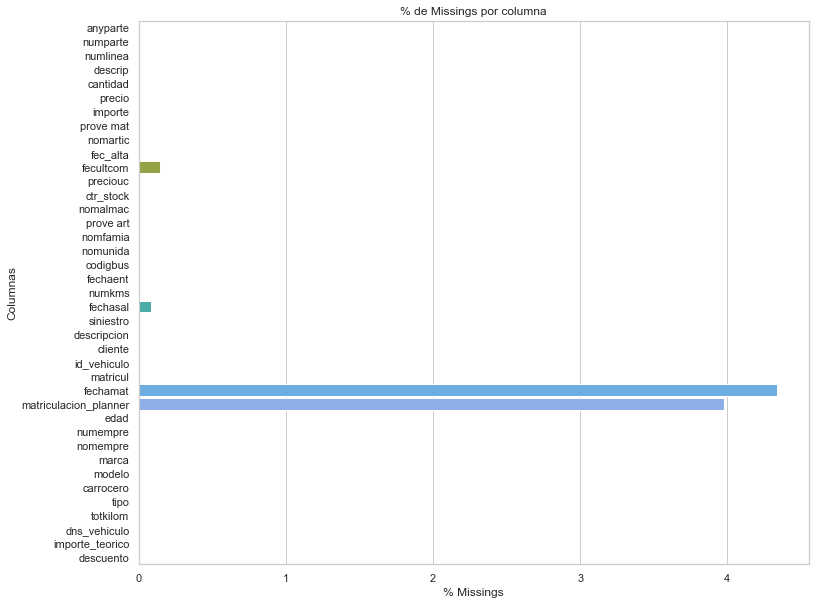

In [502]:
plot_miss(missings_df)

In [503]:
col_date=df.select_dtypes(include=np.datetime64).columns.tolist()
col_date

['fec_alta',
 'fecultcom',
 'fechaent',
 'fechasal',
 'fechamat',
 'matriculacion_planner']

eliminamos las filas con Missings en la fecha

In [504]:
df= df.dropna(axis=1)#subset=['codigbus'])
print(df.isna().sum().sum())

0


## Exportamos Dataframe

In [506]:
ruta_new_df=os.path.join("data",'taller_vehiculo.csv')
df.to_csv(ruta_new_df, sep = '|' ,index = False)

In [508]:
df.shape

(97848, 35)

In [509]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'preciouc', 'ctr_stock',
       'nomalmac', 'prove art', 'nomfamia', 'nomunida', 'codigbus', 'fechaent',
       'numkms', 'siniestro', 'descripcion', 'cliente', 'id_vehiculo',
       'matricul', 'edad', 'numempre', 'nomempre', 'marca', 'modelo',
       'carrocero', 'tipo', 'totkilom', 'dns_vehiculo', 'importe_teorico',
       'descuento'],
      dtype='object')

In [156]:
pd.unique(df['dns_vehiculo'])

array(['bunyol', 'tviacentro', 'transvia', 'laserranica', 'lamarina',
       'SIN ASIGNAR', 'fernanbus', 'maganeto', 'therpasa', 'ambulancias'],
      dtype=object)

In [157]:
dns = df.groupby('dns_vehiculo')['dns_vehiculo'].count().sort_values(ascending=False)

Total dns :  93395 
 dns_vehiculo
transvia       26950
bunyol         25838
fernanbus      15725
SIN ASIGNAR    13864
lamarina        4625
tviacentro      3918
laserranica     2447
maganeto          14
ambulancias       13
therpasa           1
Name: dns_vehiculo, dtype: int64


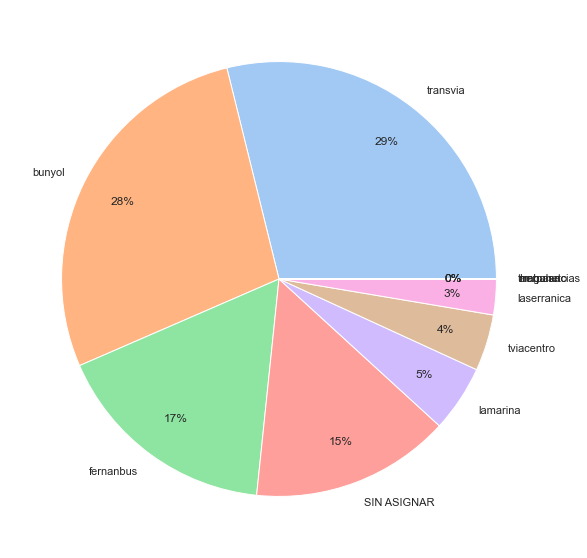

In [158]:
colors = sns.color_palette('pastel')[0:23]
plt.figure(figsize=(10,10))

#create pie chart
plt.pie(dns ,labels=dns .index, colors = colors, autopct='%1.00f%%', pctdistance=0.8) #'%.0f%%')
print('Total dns : ', dns.sum(),'\n', dns)

plt.show()

In [159]:
df[(df['dns_vehiculo']=='transvia')].shape

(26950, 39)

In [160]:
df.sample(5)

,anyparte,numparte,numlinea,descrip,cantidad,precio,importe,prove mat,nomartic,fec_alta,fecultcom,preciouc,ctr_stock,nomalmac,prove art,nomfamia,nomunida,codigbus,fechaent,numkms,fechasal,siniestro,descripcion,cliente,id_vehiculo,matricul,fechamat,matriculacion_planner,edad,numempre,nomempre,marca,modelo,carrocero,tipo,totkilom,dns_vehiculo,importe_teorico,descuento
39000,2015,1505345,1,TENSOR ELÁSTICO AZUL SE-R 27G,1.0,237.20,237.20,CIVIPARTS,TENSOR ELÁSTICO AZUL SE-R 27G,2014-06-30,2017-10-13,237.0000,1,ALMACEN QUART,CIVIPARTS,AIRE ACOND. Y CALEFACCION,UNIDADES,F178,2015-07-21,650416,2015-07-21,0,CIVIPARTS,CIVIPARTS,895.0,8319GCM,2008-04-04,2008-04-04,14.0,95,Fernanbus,SCANIA,CITY MAGNUS II,CASTROSUA,Urbano,978681.0,fernanbus,237.20,0.00
12732,2009,95315,14,CHAPA COLECTORA ACEITE MERCEDES,1.0,21.34,21.34,DIVESA,CHAPA COLECTORA ACEITE MERCEDES,2009-11-24,2015-08-28,32.3048,1,ALMACEN QUART,DIVESA,MATERIAL CAJAS CAMBIO,UNIDADES,T227,2009-11-16,526935,2009-12-16,0,DIVESA,DIVESA,200.0,8460CGZ,2003-04-25,2003-04-25,19.0,2,Transvia,MERCEDES BENZ,TOURING,NOGE,Discrecional,2056549.0,transvia,21.34,0.00
48013,2021,2101191,1,VARILLA NIVEL ACEITE SCANIA,1.0,59.59,47.67,"SCANIA SCAVALENCIA, S.A.",VARILLA NIVEL ACEITE SCANIA,2021-02-16,2021-06-04,47.6720,1,ALMACEN QUART,"SCANIA SCAVALENCIA, S.A.",ELEMENTOS MOTOR,UNIDADES,I708,2021-02-16,964015,2021-02-16,0,"SCANIA SCAVALENCIA, S.A.","SCANIA SCAVALENCIA, S.A.",369.0,8194GYZ,2010-10-13,2010-10-13,12.0,46,Travicoi,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,SIN ASIGNAR,-1.0,SIN ASIGNAR,59.59,11.92
97278,2021,2109400,5,LIQUIDO FRENOS DOT 4 LV HIGH PERFOR,1.0,18.08,17.18,VEDAT MEDITERRANEO S.L.,LIQUIDO FRENOS DOT 4 LV HIGH PERFOR,2022-01-07,2022-05-31,17.1760,1,ALMACEN QUART,VEDAT MEDITERRANEO S.L.,ACEITES Y LUBRICANTES,UNIDADES,ER643,2021-12-14,506527,2021-12-15,0,VEDAT MEDITERRANEO S.L.,VEDAT MEDITERRANEO S.L.,186.0,0521JMX,2016-03-31,2016-03-31,6.0,10,Autos Diamond,FORD,MONDEO BA7,SIN ASIGNAR,TURISMO,1252473.0,transvia,18.08,0.90
70702,2018,1811269,6,FILTRO COMBUSTIBLE VOLVO,1.0,44.60,31.22,"COMERCIAL DE AUTOMOCION RUBIO, S.L.",FILTRO COMBUSTIBLE VOLVO,2014-11-14,2020-06-04,31.3740,1,ALMACEN QUART,"COMERCIAL DE AUTOMOCION RUBIO, S.L.",FILTROS,UNIDADES,G079,2018-11-20,275000,2018-11-20,0,"COMERCIAL DE AUTOMOCION RUBIO, S.L.","COMERCIAL DE AUTOMOCION RUBIO, S.L.",494.0,0739JJX,2015-11-03,2015-11-03,7.0,72,La Marina Gandiense,VOLVO,SC7,SUSUNDEGUI,Discrecional,2319356.0,lamarina,44.60,13.38


## Correlaciones

In [161]:
# from warnings import filterwarnings
# filterwarnings(action='ignore', category=DeprecationWarning, message='`np.bool` is a deprecated alias')

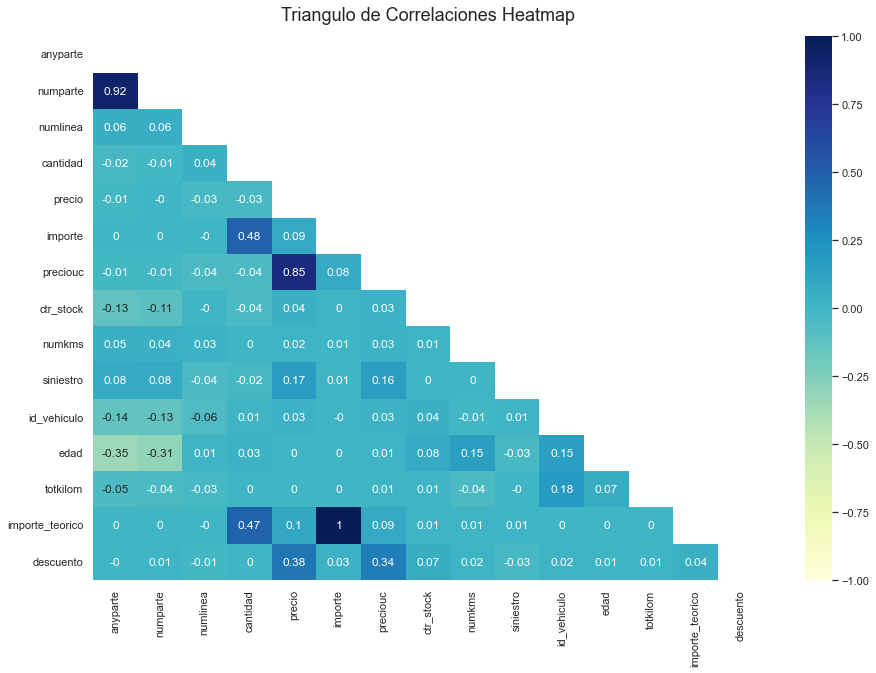

In [162]:
correlaciones(df)

In [163]:
# df.drop(df['totkilom']

In [164]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo',
       'importe_teorico', 'descuento'],
      dtype='object')

# Graficos

 correlación entre pares

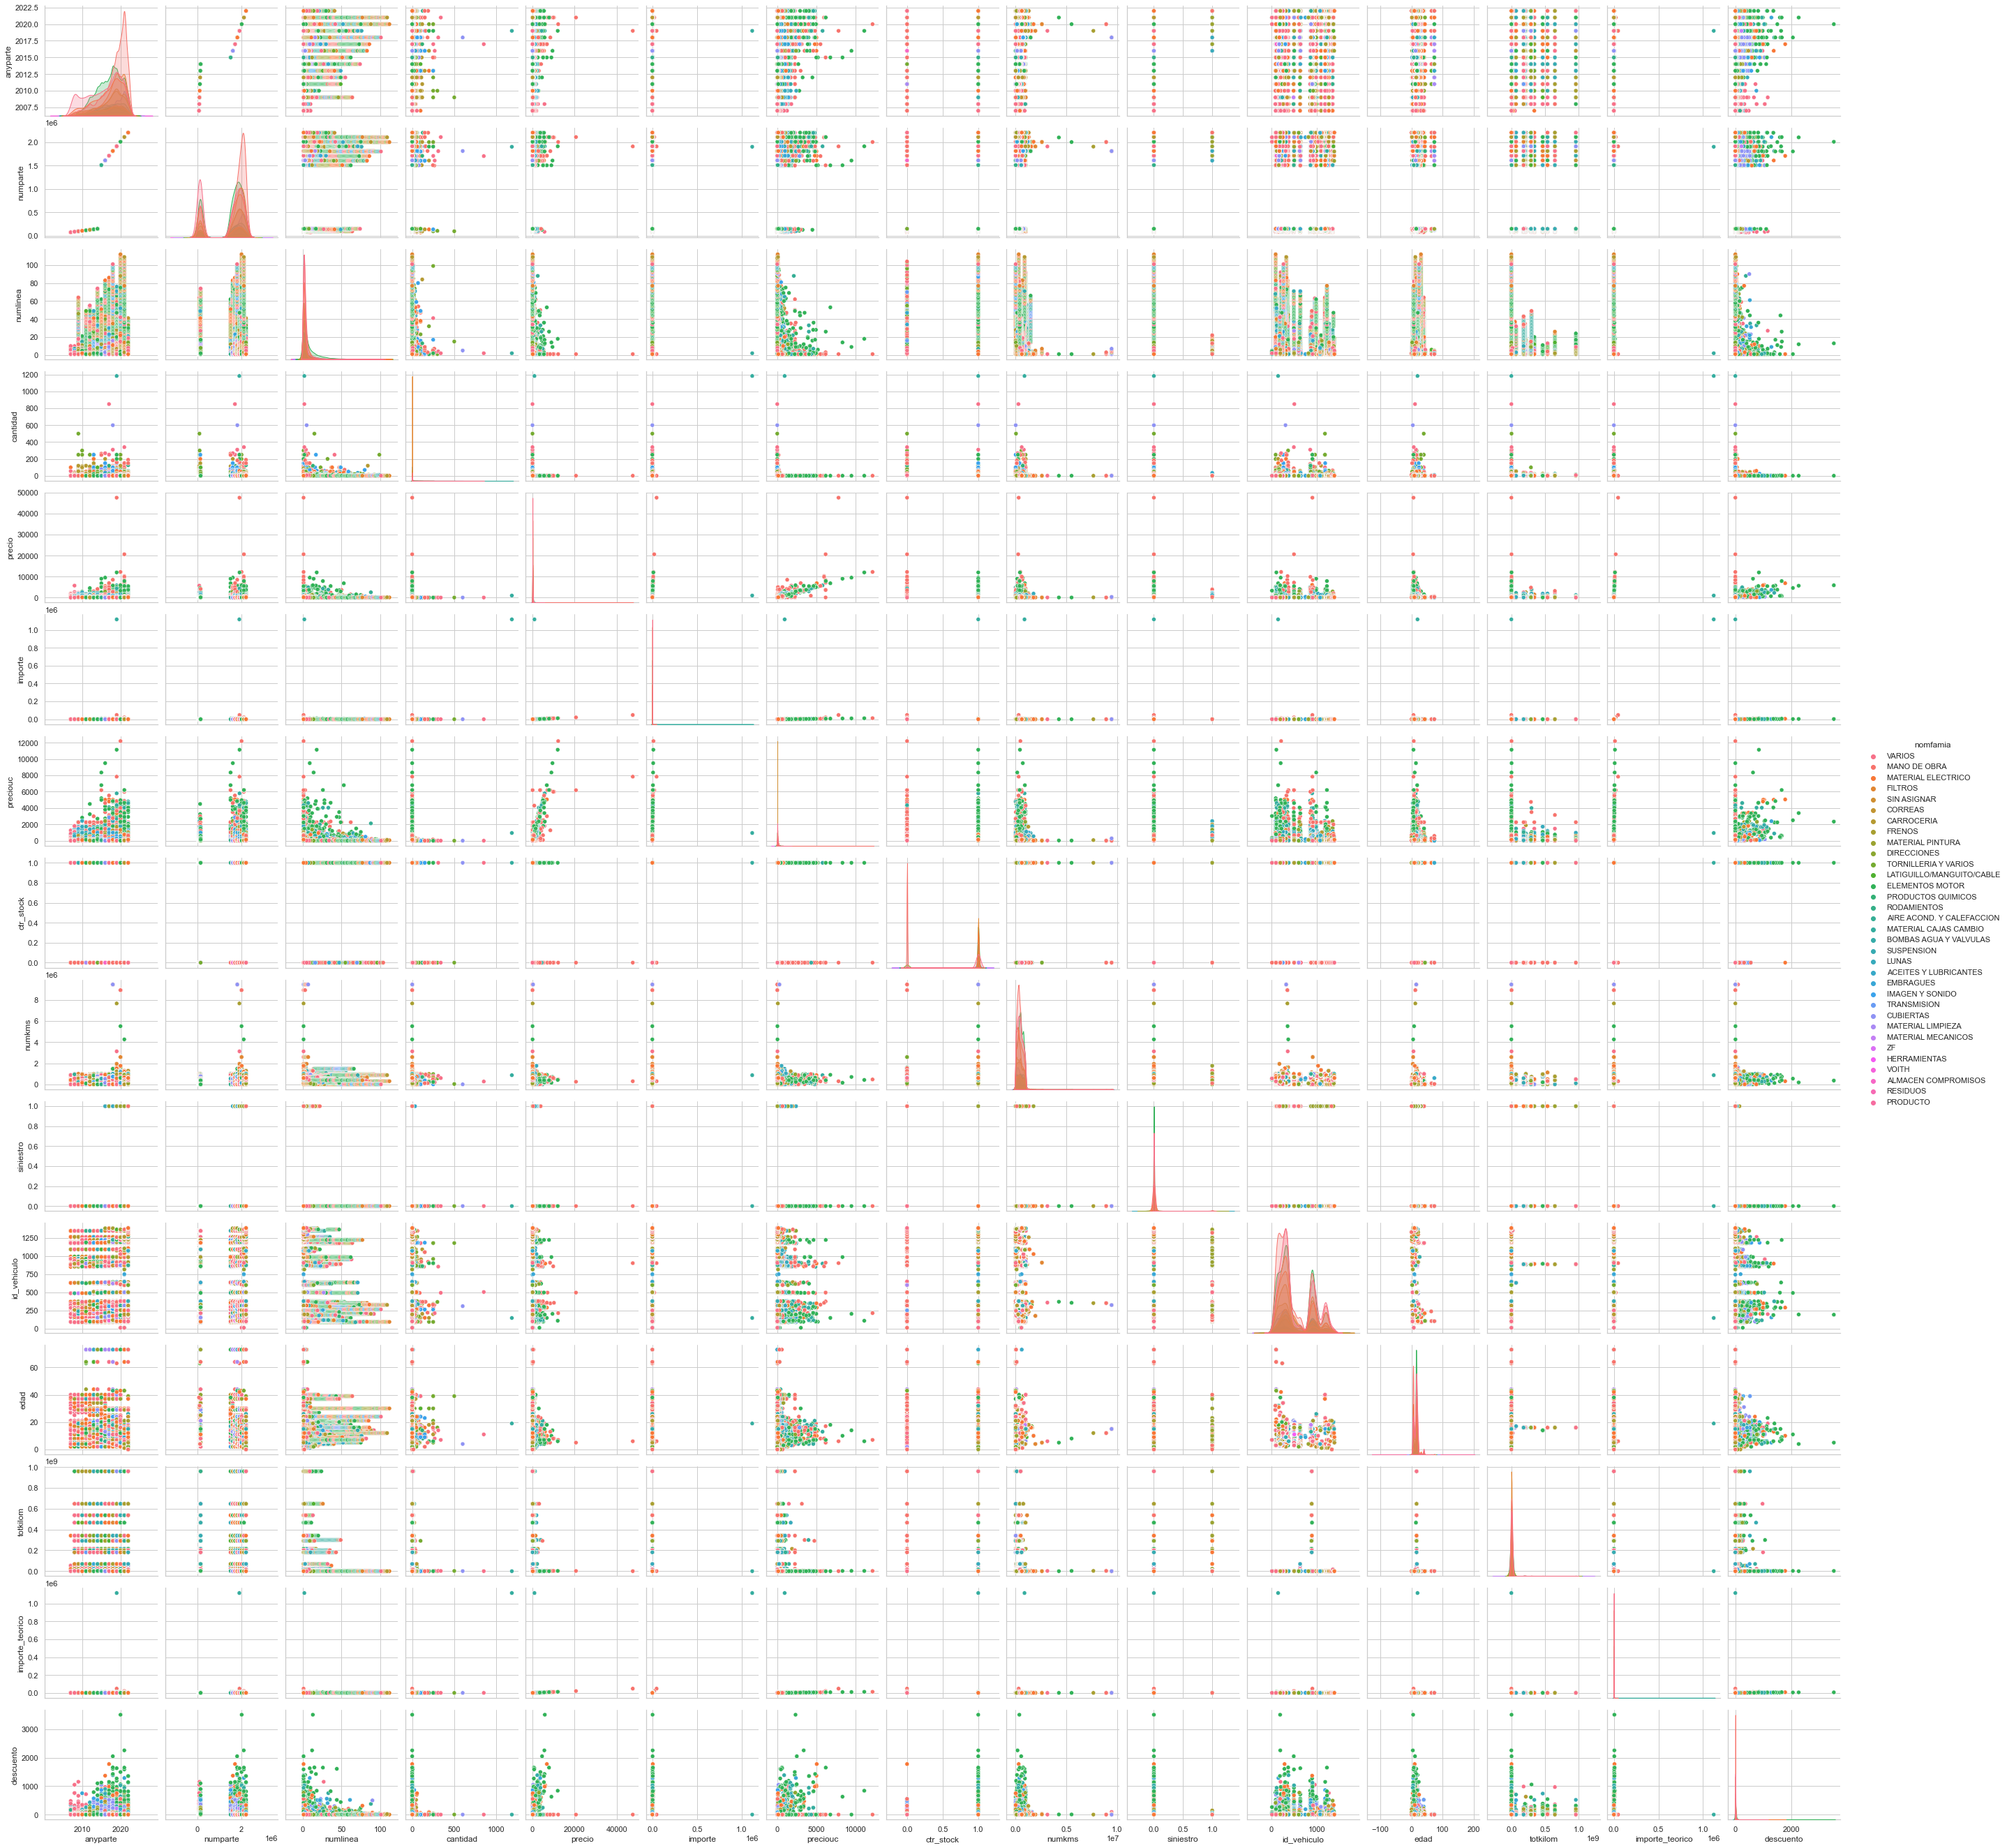

In [165]:
sns.pairplot(df,hue='nomfamia')
plt.show()

Mostramos el número de partes por año

Text(0.5, 0, 'Cantidad de observaciones')

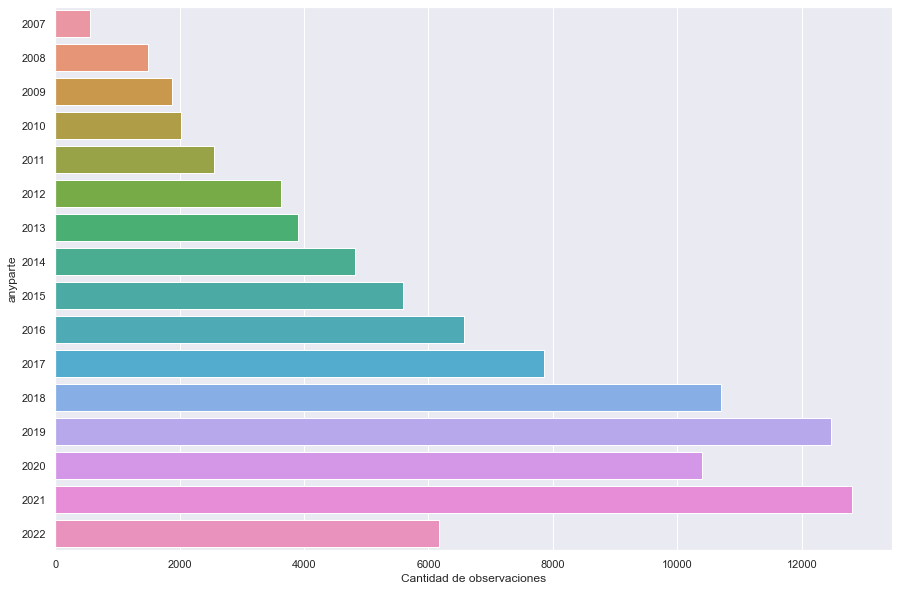

In [166]:
plt.figure(figsize=(15,10))
sns.set(style='darkgrid')

sns.countplot(y='anyparte',data=df)

plt.xlabel('Cantidad de observaciones') 

In [167]:
df1 = df.groupby('nomfamia').importe.mean()
df1

nomfamia
ACEITES Y LUBRICANTES         46.586222
AIRE ACOND. Y CALEFACCION    188.421269
ALMACEN COMPROMISOS           10.741316
BOMBAS AGUA Y VALVULAS       212.836956
CARROCERIA                    97.928443
CORREAS                       40.039326
CUBIERTAS                    222.528723
DIRECCIONES                  179.271147
ELEMENTOS MOTOR              167.365093
EMBRAGUES                    315.694882
FILTROS                       41.229532
FRENOS                       115.279809
HERRAMIENTAS                  33.469263
IMAGEN Y SONIDO              171.739623
LATIGUILLO/MANGUITO/CABLE     66.149097
LUNAS                        997.703257
MANO DE OBRA                 115.862421
MATERIAL CAJAS CAMBIO        631.108457
MATERIAL ELECTRICO           118.237007
MATERIAL LIMPIEZA              7.156089
MATERIAL MECANICOS           213.070000
MATERIAL PINTURA              99.055826
PRODUCTO                       6.830000
PRODUCTOS QUIMICOS            22.162113
RESIDUOS                       

Mostramos la media de importe por famila de avería

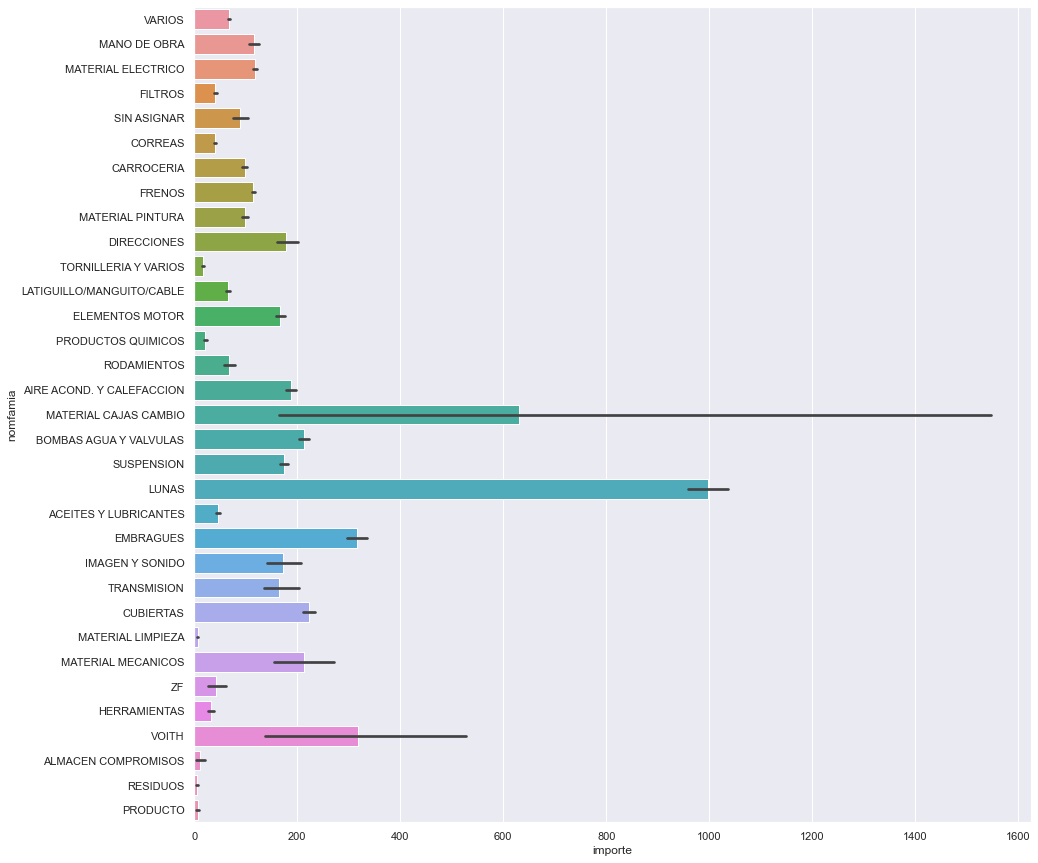

In [168]:
plt.figure(figsize=(15,15))
sns.set(style='darkgrid')

sns.barplot(x='importe',y='nomfamia',data=df)

#plt.xlabel('Cantidad de observaciones') 
plt.show()

In [196]:
df.importe.describe()

count    9.339500e+04
mean     1.357550e+02
std      3.679499e+03
min      1.000000e-02
25%      1.484000e+01
50%      4.009000e+01
75%      1.150000e+02
max      1.119894e+06
Name: importe, dtype: float64

In [169]:
df2=df.groupby('siniestro').importe.mean() 



media de importe si es siniestro o no



siniestro
0    128.136253
1    518.241913
Name: importe, dtype: float64


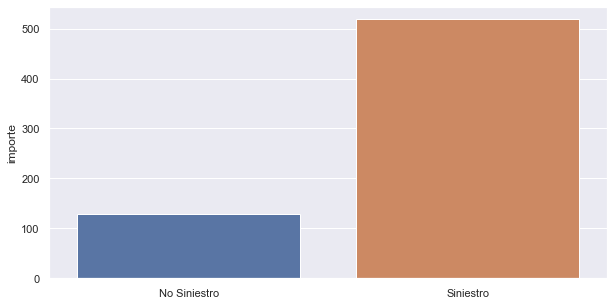

In [170]:
plt.figure(figsize=(10,5))
sns.set(style='darkgrid')
sin=['No Siniestro','Siniestro']
sns.barplot(x= sin ,y=df2 ,data=df2)
#plt.xlabel('Cantidad de observaciones') 
print(df2)
plt.show()

In [171]:
df2=df.groupby('siniestro').siniestro.count()
df2

siniestro
0    91571
1     1824
Name: siniestro, dtype: int64

siniestro
0    91571
1     1824
Name: siniestro, dtype: int64


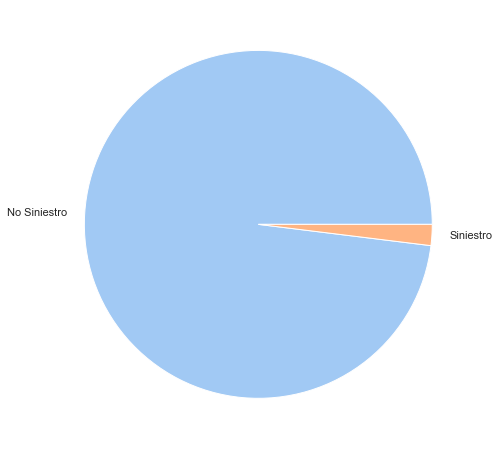

In [172]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=( 8, 8))
sin=['No Siniestro','Siniestro']
#create pie chart
plt.pie(df2,labels=sin, colors = colors)#, autopct='%.0f%%')
print(df2)
plt.show()

In [188]:
df.columns

Index(['anyparte', 'numparte', 'numlinea', 'descrip', 'cantidad', 'precio',
       'importe', 'prove mat', 'nomartic', 'fec_alta', 'fecultcom', 'preciouc',
       'ctr_stock', 'nomalmac', 'prove art', 'nomfamia', 'nomunida',
       'codigbus', 'fechaent', 'numkms', 'fechasal', 'siniestro',
       'descripcion', 'cliente', 'id_vehiculo', 'matricul', 'fechamat',
       'matriculacion_planner', 'edad', 'numempre', 'nomempre', 'marca',
       'modelo', 'carrocero', 'tipo', 'totkilom', 'dns_vehiculo',
       'importe_teorico', 'descuento'],
      dtype='object')

In [190]:
df5=df.groupby('ctr_stock').ctr_stock.count()
df5

ctr_stock
0    18264
1    75131
Name: ctr_stock, dtype: int64

ctr_stock
0    18264
1    75131
Name: ctr_stock, dtype: int64


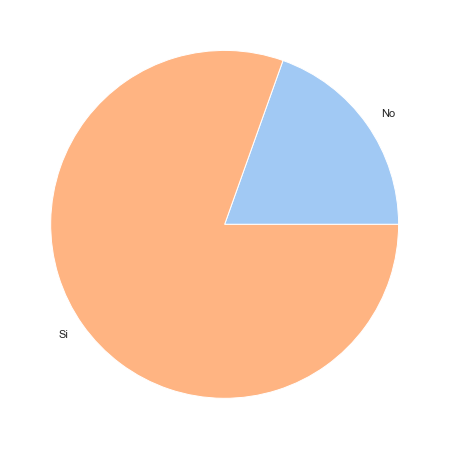

In [191]:
colors = sns.color_palette('pastel')[0:5]
plt.figure(figsize=( 8, 8))
sin=['No','Si']
#create pie chart
plt.pie(df5,labels=sin, colors = colors)#, autopct='%.0f%%')
print(df5)
plt.show()

In [173]:


df4=df.groupby('codigbus')['codigbus'].count()
df4=df4.sort_values()
filtered = df4[(df4 >= 700)]
filtered.count()

10

In [174]:
values= list(map(str,filtered))
values
#list(map(str, values))

['712', '717', '722', '725', '762', '805', '827', '926', '1290', '1356']

codigbus
A109     712
D112     717
T251     722
E651     725
F176     762
I707     805
T227     827
H094     926
T241    1290
T222    1356
Name: codigbus, dtype: int64


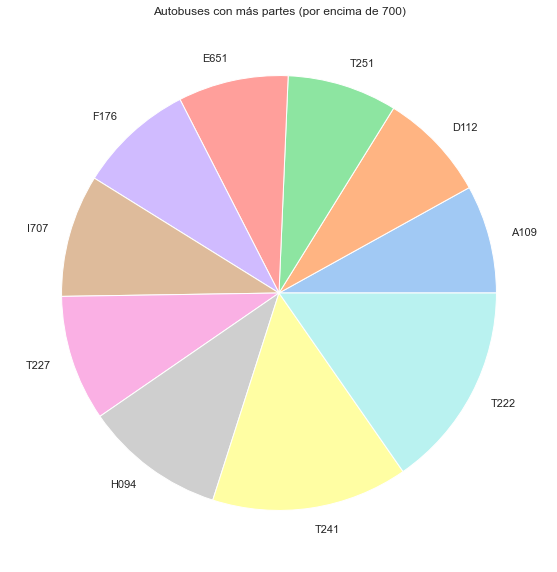

In [192]:
colors = sns.color_palette('pastel')[0:23]
plt.figure(figsize=(10,10))

#create pie chart
plt.pie(filtered ,labels=filtered .index, colors = colors)#, autopct='%1.00f%%', pctdistance=0.9) #'%.0f%%')
print(filtered )
plt.title('Autobuses con más partes (por encima de 700)')
plt.show()

In [176]:
df3=df.groupby('nomempre').importe.sum()
df3=df3.sort_values(ascending=False)

Gasto total  repartido por las empresas

nomempre
Fernanbus                1650881.85
HOSOJU                   1631629.36
Transvia                 1555803.84
Buñol                    1492777.24
Herca                    1349622.43
Viajes Transvia           683258.07
La Marina Gandiense       631580.00
La Hispano Chelvana       585928.00
La Concepcion             552962.52
Autos Diamond             477612.65
Transvia Toledo           475575.58
Starbus                   335660.90
Medtrast                  333625.55
La Serranica              308859.01
Travicoi                  252310.65
Urbanos de Torrent        251561.01
Cave Talleres             105780.12
Escartin                    1620.00
Magallon                     596.73
Ambulancias Autónomas        484.07
Ambulancias Edetanas         391.77
NOC RENTING                  188.21
J. Aguilar                   128.53
Name: importe, dtype: float64

Total = 12678838.090000002



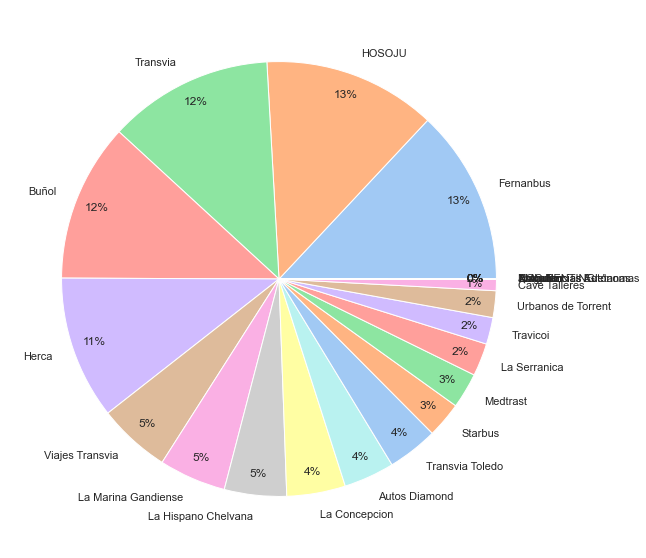

In [177]:
colors = sns.color_palette('pastel')[0:23]
plt.figure(figsize=(10,10))

#create pie chart
plt.pie(df3,labels=df3.index, colors = colors, autopct='%.0f%%', pctdistance=0.9)
print(df3)
print(f'\nTotal = {df3.sum()}\n')
plt.show()

Media de los gasto por empresa

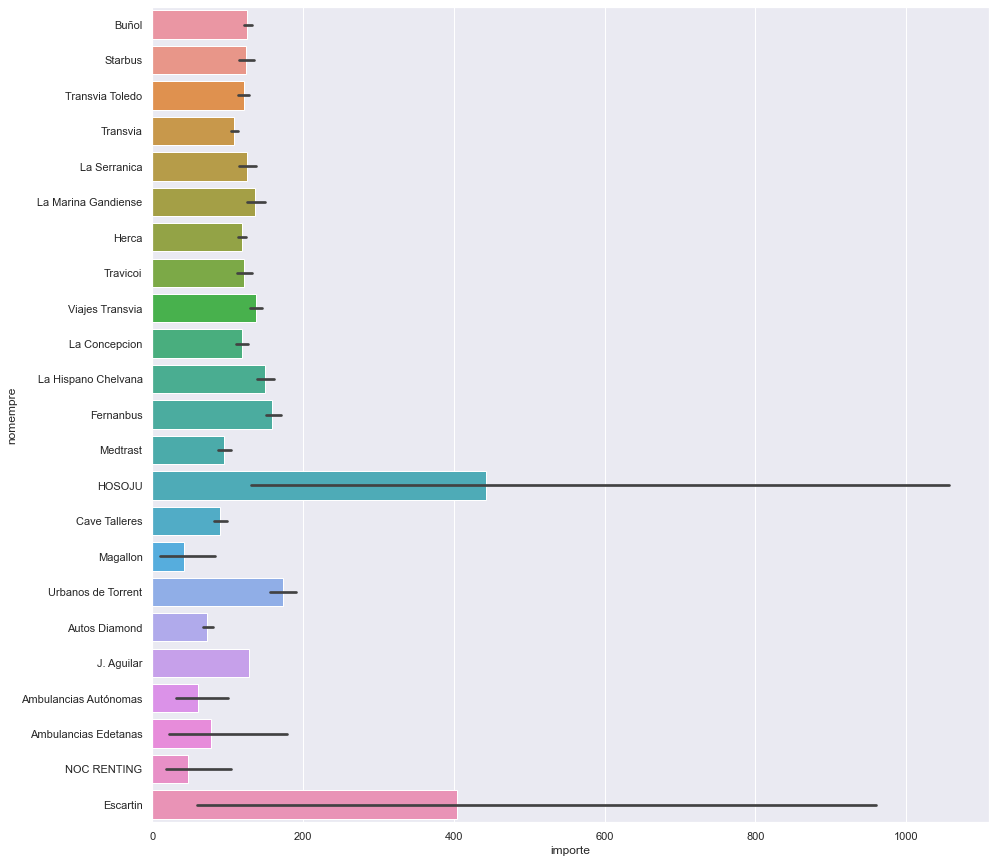

In [178]:
plt.figure(figsize=(15,15))
sns.set(style='darkgrid')

sns.barplot(x='importe',y='nomempre',data=df)

#plt.xlabel('Cantidad de observaciones') 
plt.show()

distibución de 'anyparte'

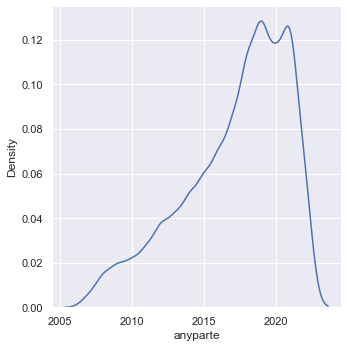

In [201]:
#fig, ax = plt.subplots(figsize=(8, 6))
#sns.displot(df['anyparte'], kde=True, bins=40, rug=True)
sns.displot(df['anyparte'], kind="kde", bw_adjust=1.5)
plt.show()

 relación entre cantidad  e importe

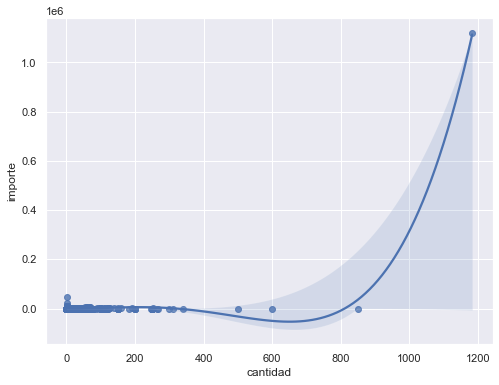

In [180]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="cantidad", y="importe", data=df, order=4)

plt.show()

relación entre preciouc y precio

<AxesSubplot:xlabel='precio', ylabel='importe'>

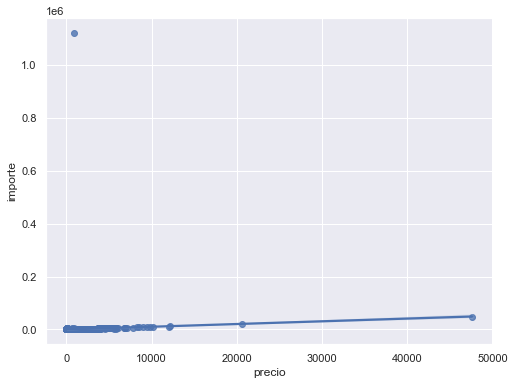

In [181]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="precio", y="importe",data=df, order=1)

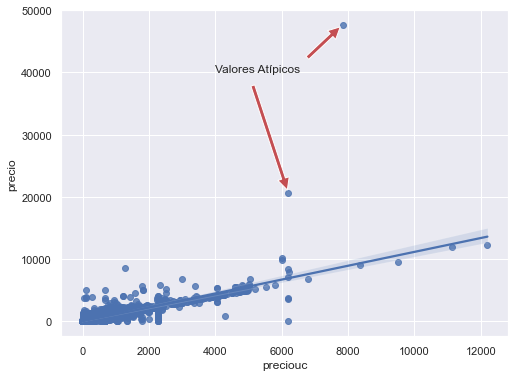

In [182]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="preciouc", y="precio",data=df, order=1)
ax.annotate('Valores Atípicos', xy=(7900, 48000), xytext=(4000, 40000), arrowprops = dict(facecolor='r', shrink=0.1))
ax.annotate('', xy=(6300, 19000), xytext=(5000, 40000), arrowprops = dict(facecolor='r', shrink=0.1))
plt.show()

relación entr epreciuc y la la edad

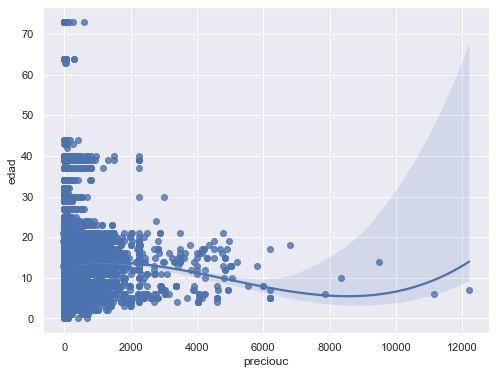

In [183]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.regplot(x="preciouc", y="edad", data=df, order=3)
plt.show()

In [184]:
#sns.pairplot(df, hue='ctr_stock')
#plt.show()

In [185]:
#sns.pairplot(df,hue='nomfamia')
#plt.show()